In [15]:
%matplotlib notebook

In [16]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [17]:
import collections as col

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.evaluation as evaluation
import thalesians.tsa.filtering as filtering
import thalesians.tsa.filtering.kalman as kalman
import thalesians.tsa.filtering.visual as visual
import thalesians.tsa.numpyutils as npu
import thalesians.tsa.optimization as optimization
import thalesians.tsa.optimization.visual as optvisual
import thalesians.tsa.processes as proc
import thalesians.tsa.randomness as rnd
import thalesians.tsa.simulation as sim

import importlib
importlib.reload(optvisual)
importlib.reload(npu)
importlib.reload(optimization)
importlib.reload(filtering)

<module 'thalesians.tsa.filtering' from 'S:\\dev\\tsa\\src\\main\\python\\thalesians\\tsa\\filtering\\__init__.py'>

In [18]:
npu.init_warnings()

In [19]:
rnd.random_state(np.random.RandomState(seed=42), force=True);

In [20]:
X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[10., 10.], mean=15., vol=[[10., .0], [.0, 1.]])

In [21]:
X.transition

array([[ 10.,   0.],
       [-10.,  10.]])

<IPython.core.display.Javascript object>


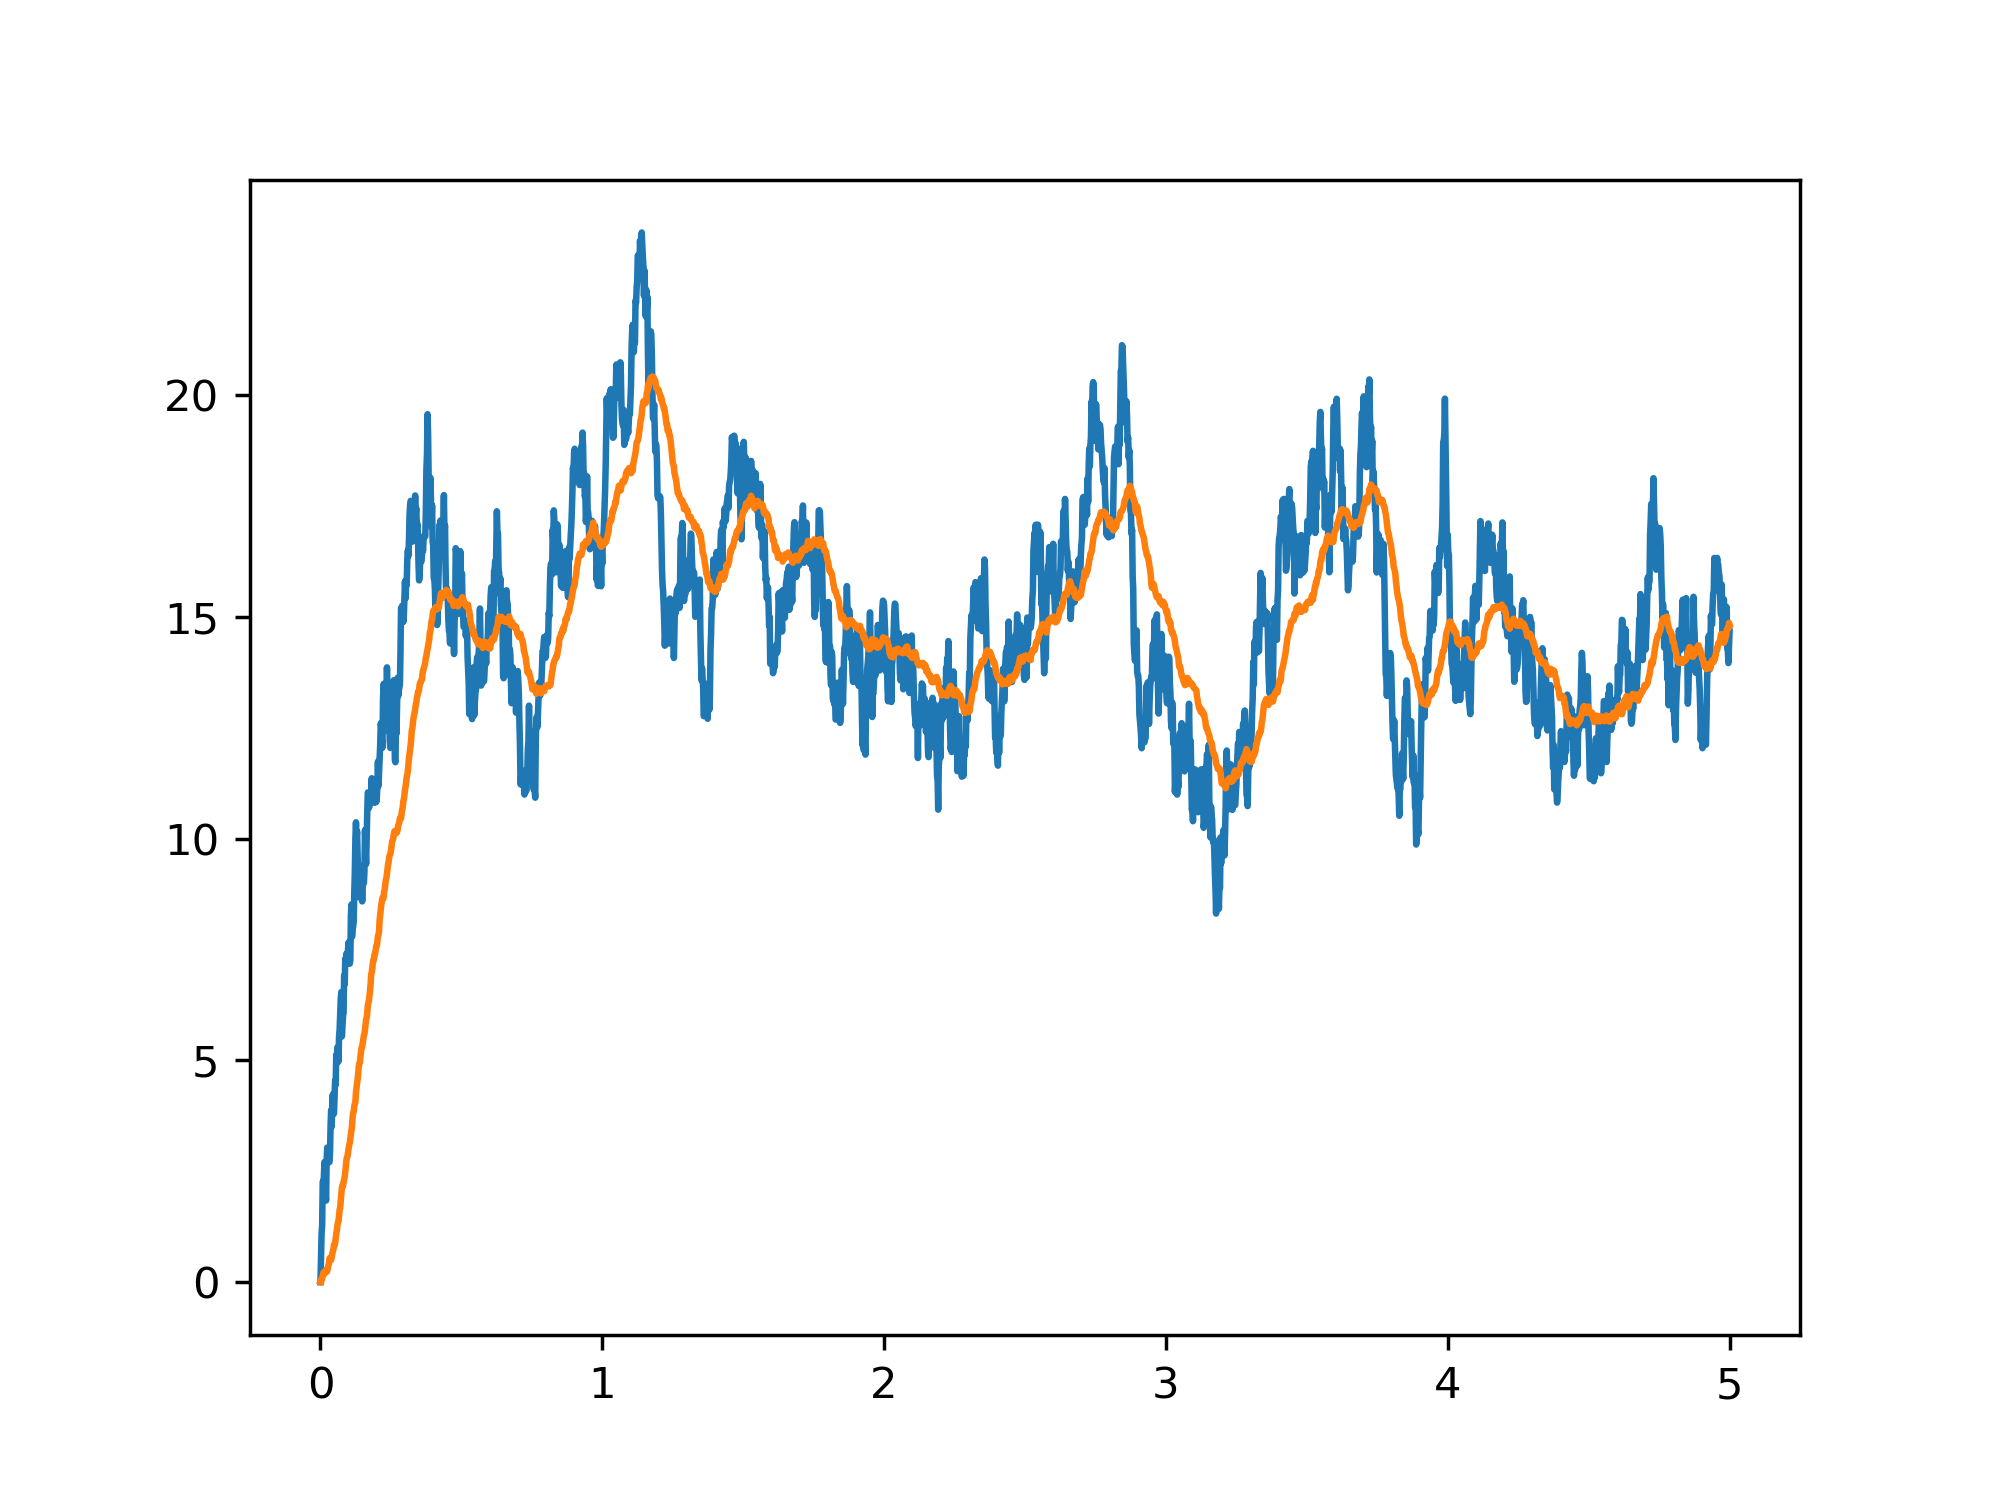

In [22]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=.002))
df = sim.run(em)
plt.plot(df);

In [9]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [10]:
run_df = filtering.run(observable=last_observable, obss=1, df=df, return_df=True)

In [11]:
run_df.df

,time,filter_name,filter_type,observable_name,accepted,obs_mean,obs_cov,predicted_obs_mean,predicted_obs_cov,cross_cov,innov_mean,innov_cov,prior_state_mean,prior_state_cov,posterior_state_mean,posterior_state_cov,true_value,log_likelihood,gain
0,0.000,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,"[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]","[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]",None,NaN,None
1,0.000,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.000000,0.0,0.000000,1000.000000,"[[0.0, 1000.0]]",0.000000,1000.000000,"[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]","[[0.0], [0.0]]","[[1000.0, 0.0], [0.0, 1000.0]]",None,-4.372816,"[[0.0], [1.0]]"
2,0.002,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,-0.018550,0.0,0.005881,1.524274,"[[38.0536803019, 1.52427428591]]",-0.024431,1.524274,"[[0.297019900399], [0.00588138808219]]","[[960.985491957, 38.0536803019], [38.053680301...","[[0.297019900399], [0.00588138808219]]","[[960.985491957, 38.0536803019], [38.053680301...",None,-1.129894,"[[24.9651133353], [1.0]]"
3,0.004,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.207413,0.0,-0.024088,0.033933,"[[0.421315561188, 0.0339327889712]]",0.231502,0.033933,"[[-0.00969899966277], [-0.024088236855]]","[[10.7369221599, 0.421315561188], [0.421315561...","[[-0.00969899966277], [-0.024088236855]]","[[10.7369221599, 0.421315561188], [0.421315561...",None,-0.016945,"[[12.4161783915], [1.0]]"
4,0.006,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.211758,0.0,0.316364,0.025697,"[[0.213363549245, 0.0256973375212]]",-0.104606,0.025697,"[[3.10496100611], [0.31636380678]]","[[5.4859605661, 0.213363549245], [0.2133635492...","[[3.10496100611], [0.31636380678]]","[[5.4859605661, 0.213363549245], [0.2133635492...",None,0.698837,"[[8.30294379986], [1.0]]"
5,0.008,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.357234,0.0,0.296151,0.022998,"[[0.145201955233, 0.0229979575393]]",0.061083,0.022998,"[[2.48916042052], [0.296150799066]]","[[3.76482351635, 0.145201955233], [0.145201955...","[[2.48916042052], [0.296150799066]]","[[3.76482351635, 0.145201955233], [0.145201955...",None,0.886117,"[[6.31368916064], [1.0]]"
6,0.010,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.505951,0.0,0.460704,0.021692,"[[0.112237444193, 0.0216924754345]]",0.045247,0.021692,"[[3.11491588387], [0.460704275713]]","[[2.93244214235, 0.112237444193], [0.112237444...","[[3.11491588387], [0.460704275713]]","[[2.93244214235, 0.112237444193], [0.112237444...",None,0.949268,"[[5.17402656657], [1.0]]"
7,0.012,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.515241,0.0,0.621998,0.020945,"[[0.0933517674056, 0.0209445525227]]",-0.106757,0.020945,"[[3.57972924533], [0.621997921064]]","[[2.45556306551, 0.0933517674056], [0.09335176...","[[3.57972924533], [0.621997921064]]","[[2.45556306551, 0.0933517674056], [0.09335176...",None,0.741922,"[[4.45709056349], [1.0]]"
8,0.014,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.331819,0.0,0.621408,0.020474,"[[0.0814712145983, 0.0204740511079]]",-0.289589,0.020474,"[[3.33946154134], [0.621408058448]]","[[2.15556920673, 0.0814712145983], [0.08147121...","[[3.33946154134], [0.621408058448]]","[[2.15556920673, 0.0814712145983], [0.08147121...",None,-1.022636,"[[3.9792425138], [1.0]]"
9,0.016,KalmanFilter_2145234408672,<class 'thalesians.tsa.filtering.kalman.Kalman...,KalmanObservable_2145234409120,True,0.351440,0.0,0.409591,0.020160,"[[0.0735526570

<IPython.core.display.Javascript object>


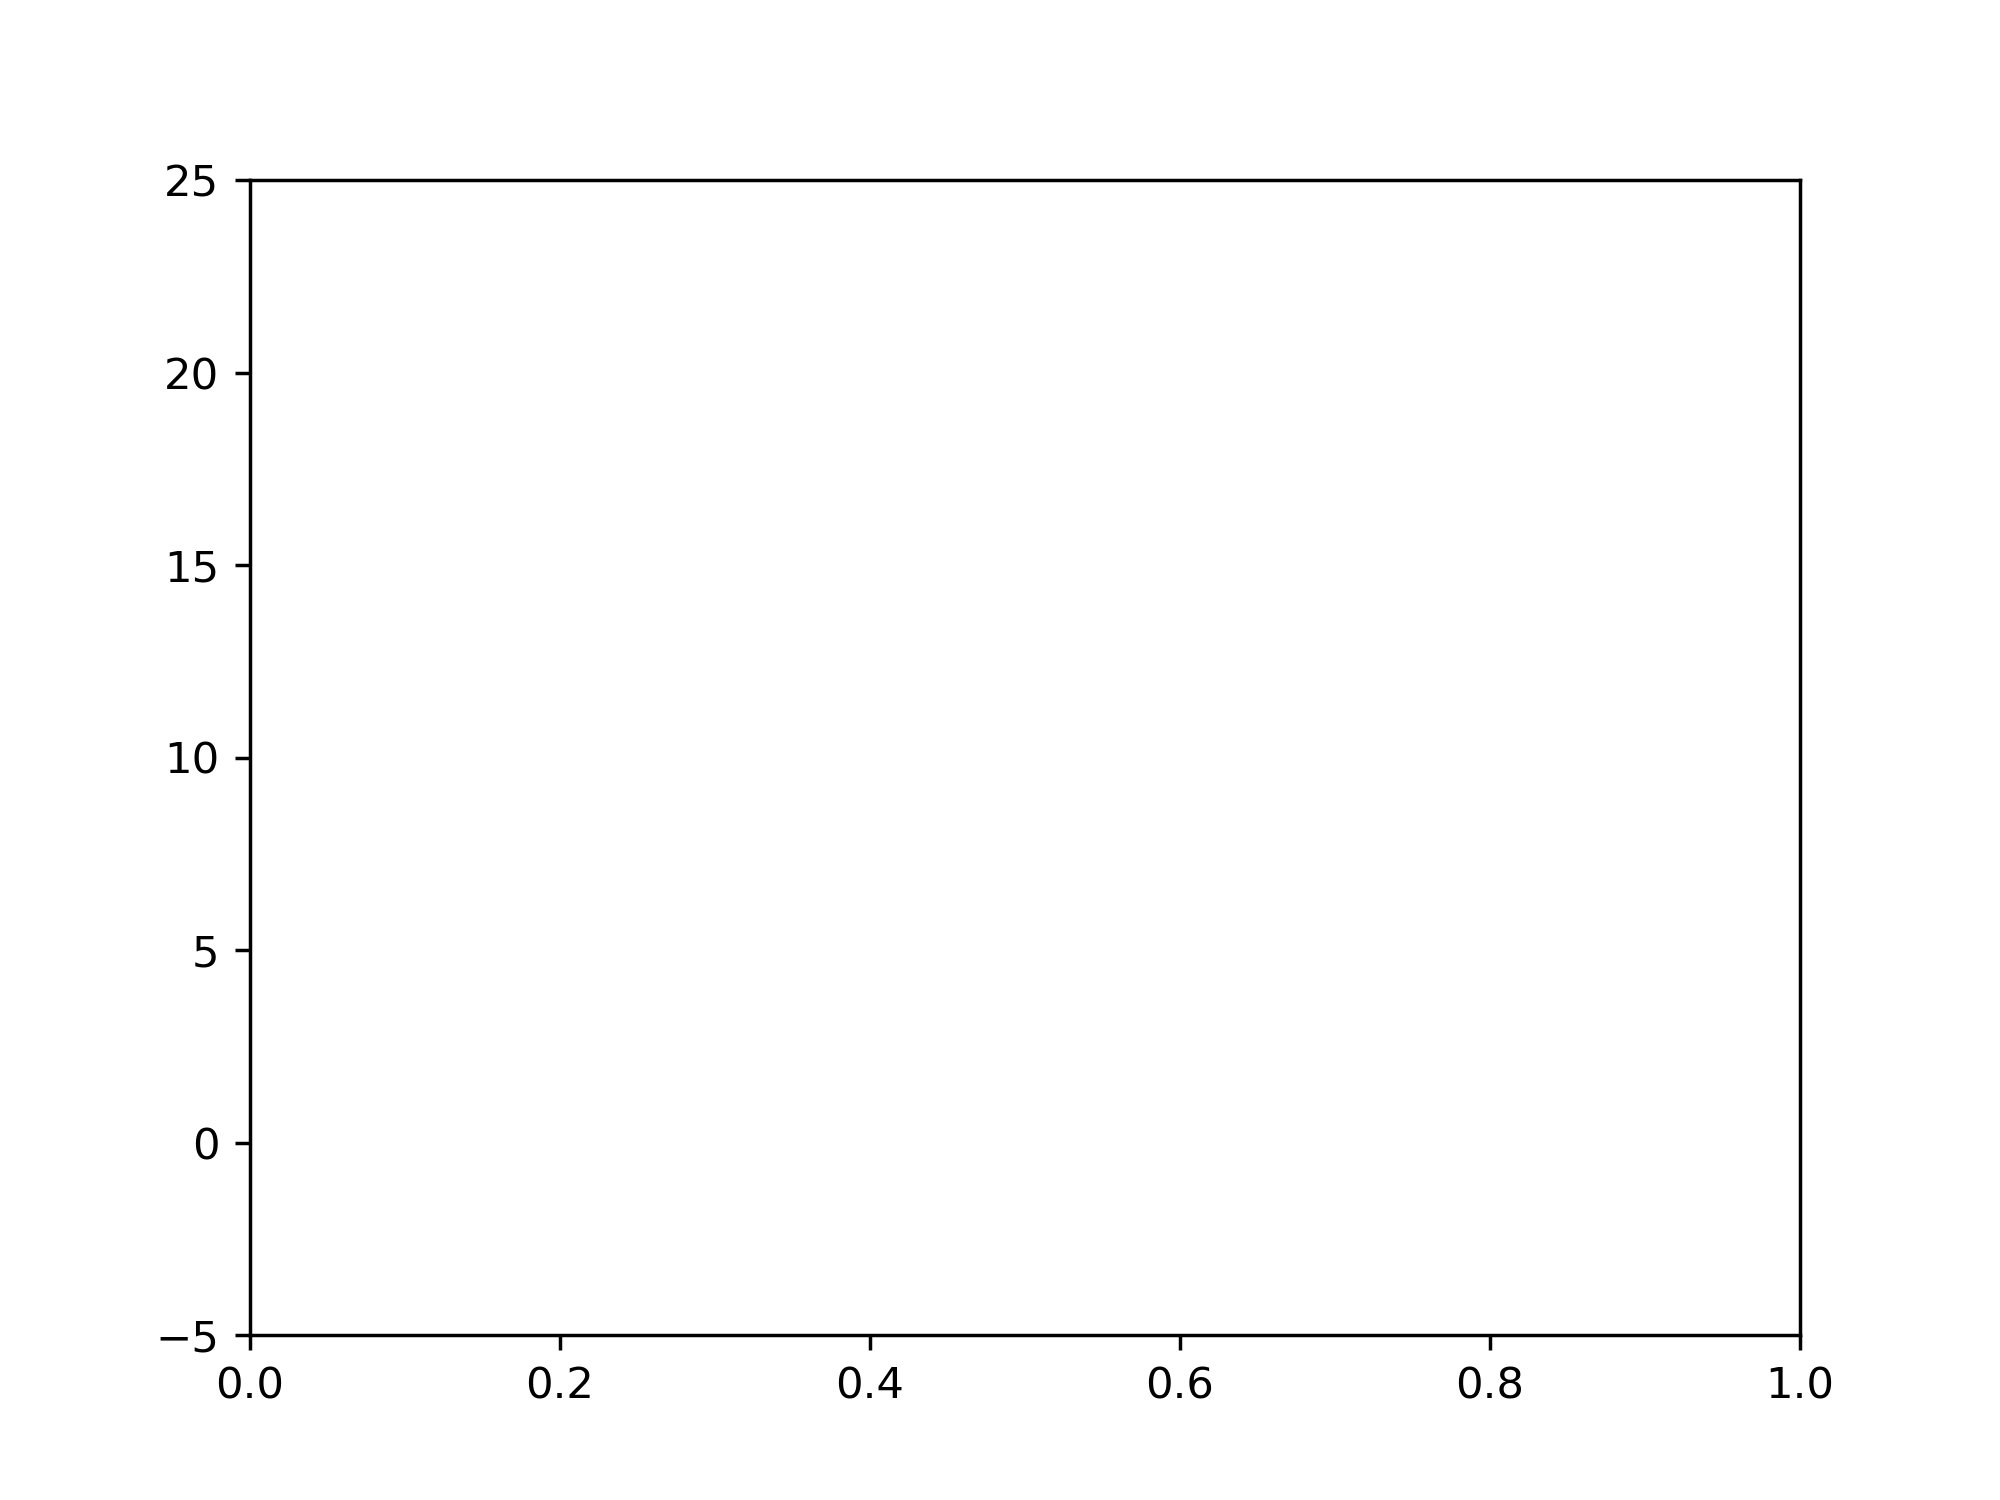

In [12]:
sp = visual.StatePlot(plot_obs_results=False)
sp.process_run_df(run_df.df)
sp.ax.set_ylim((-5, 25));

<IPython.core.display.Javascript object>


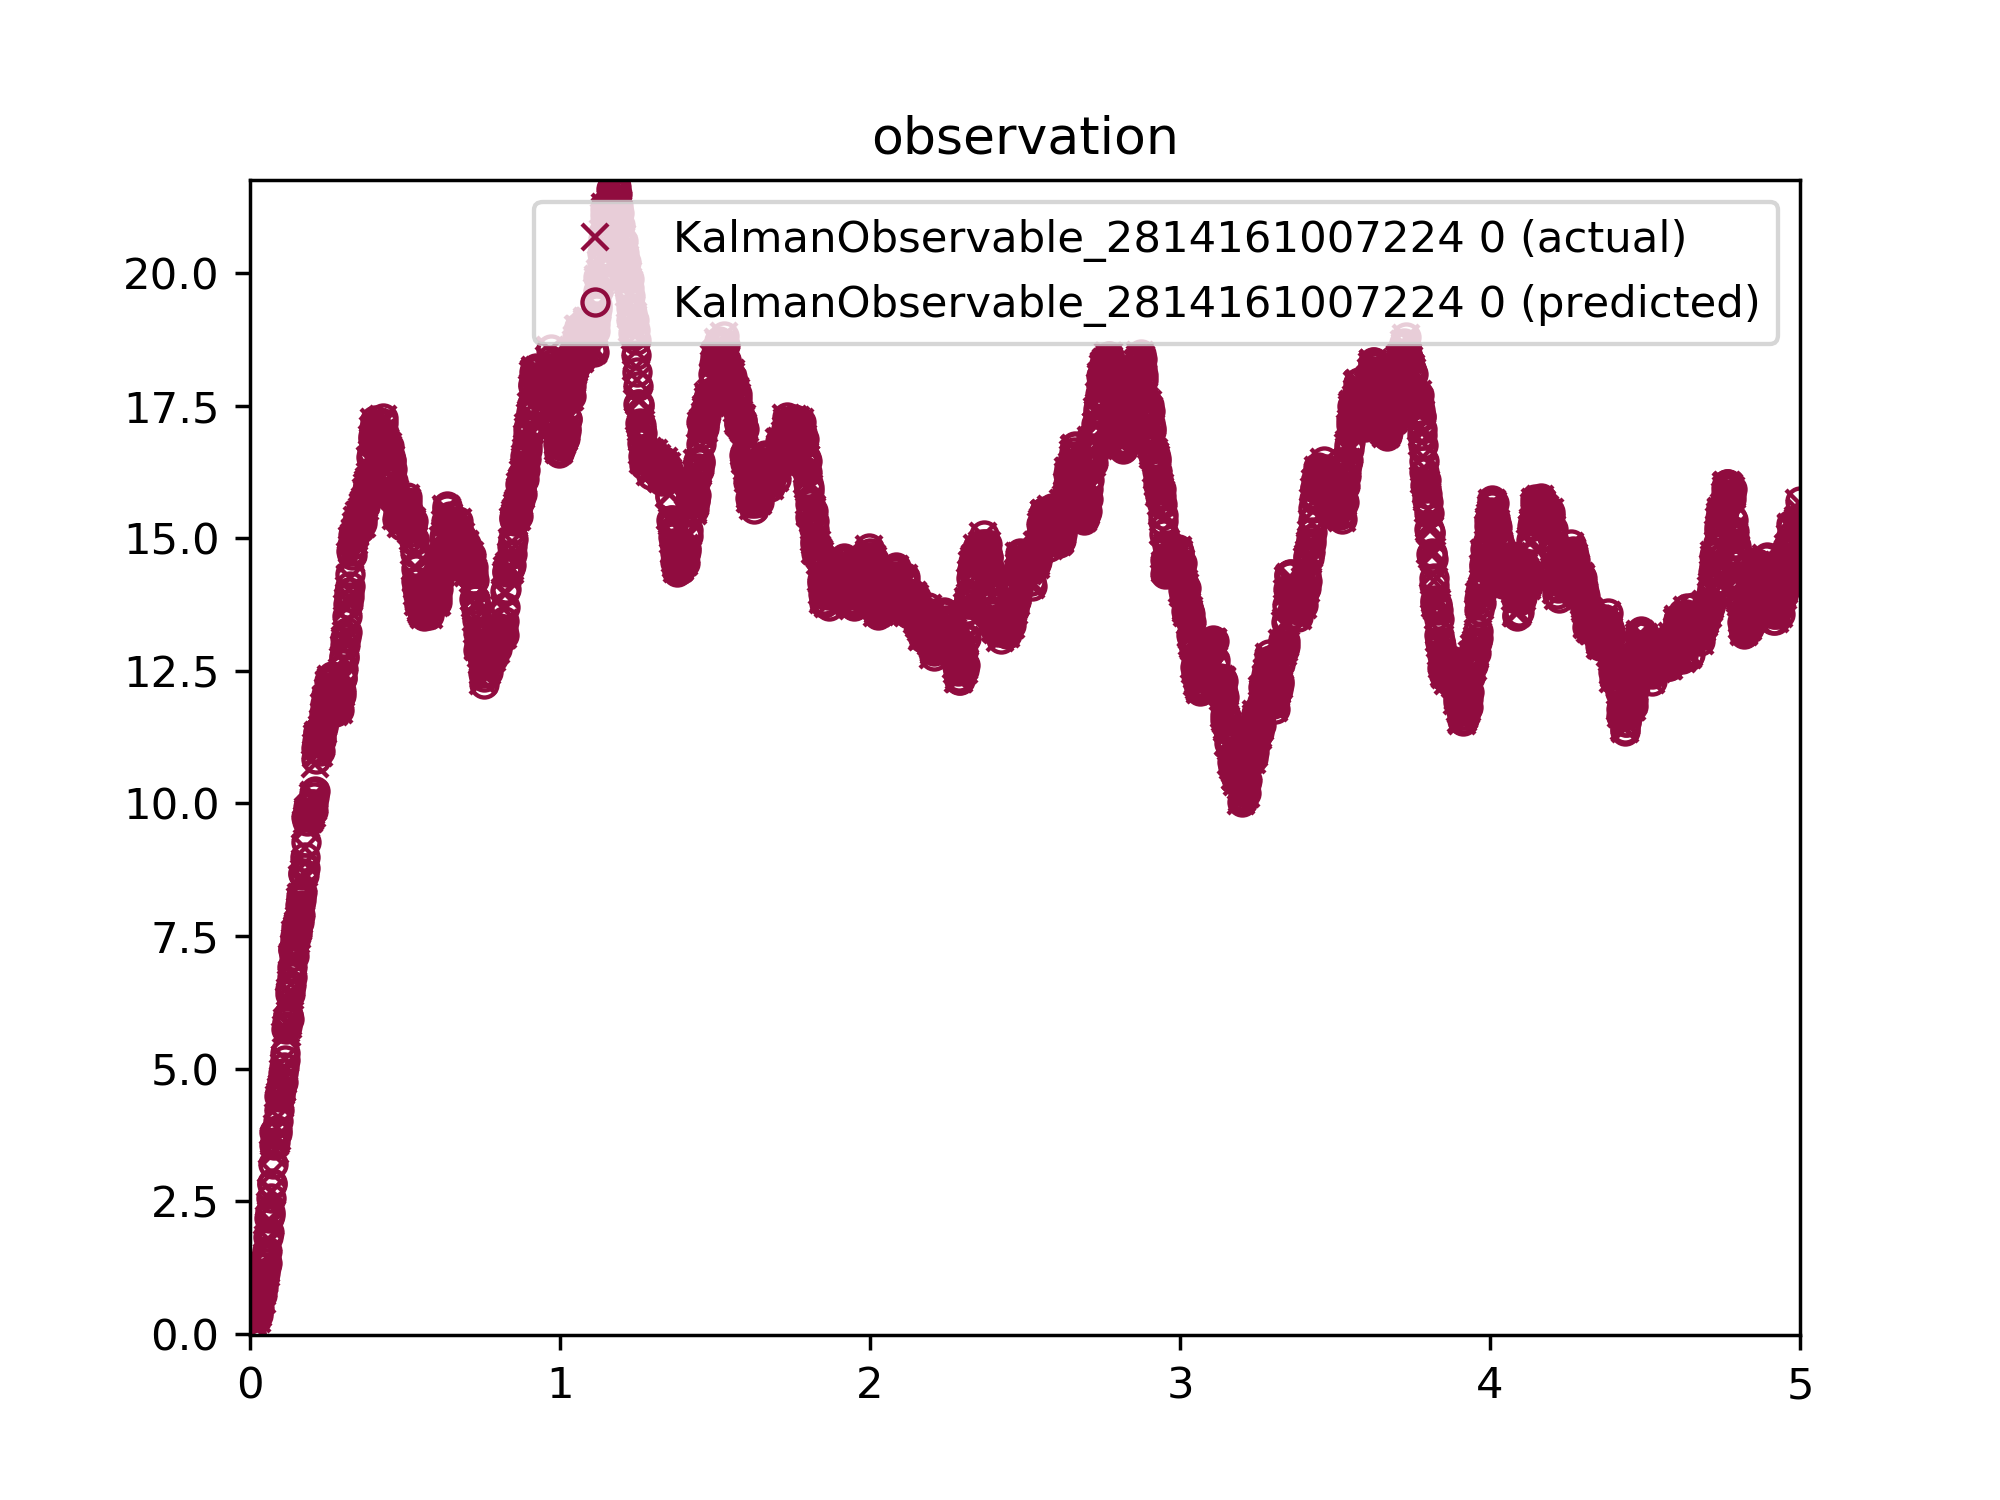

In [15]:
op = visual.ObsPlot();
op.process_run_df(run_df.df[1:])

<IPython.core.display.Javascript object>


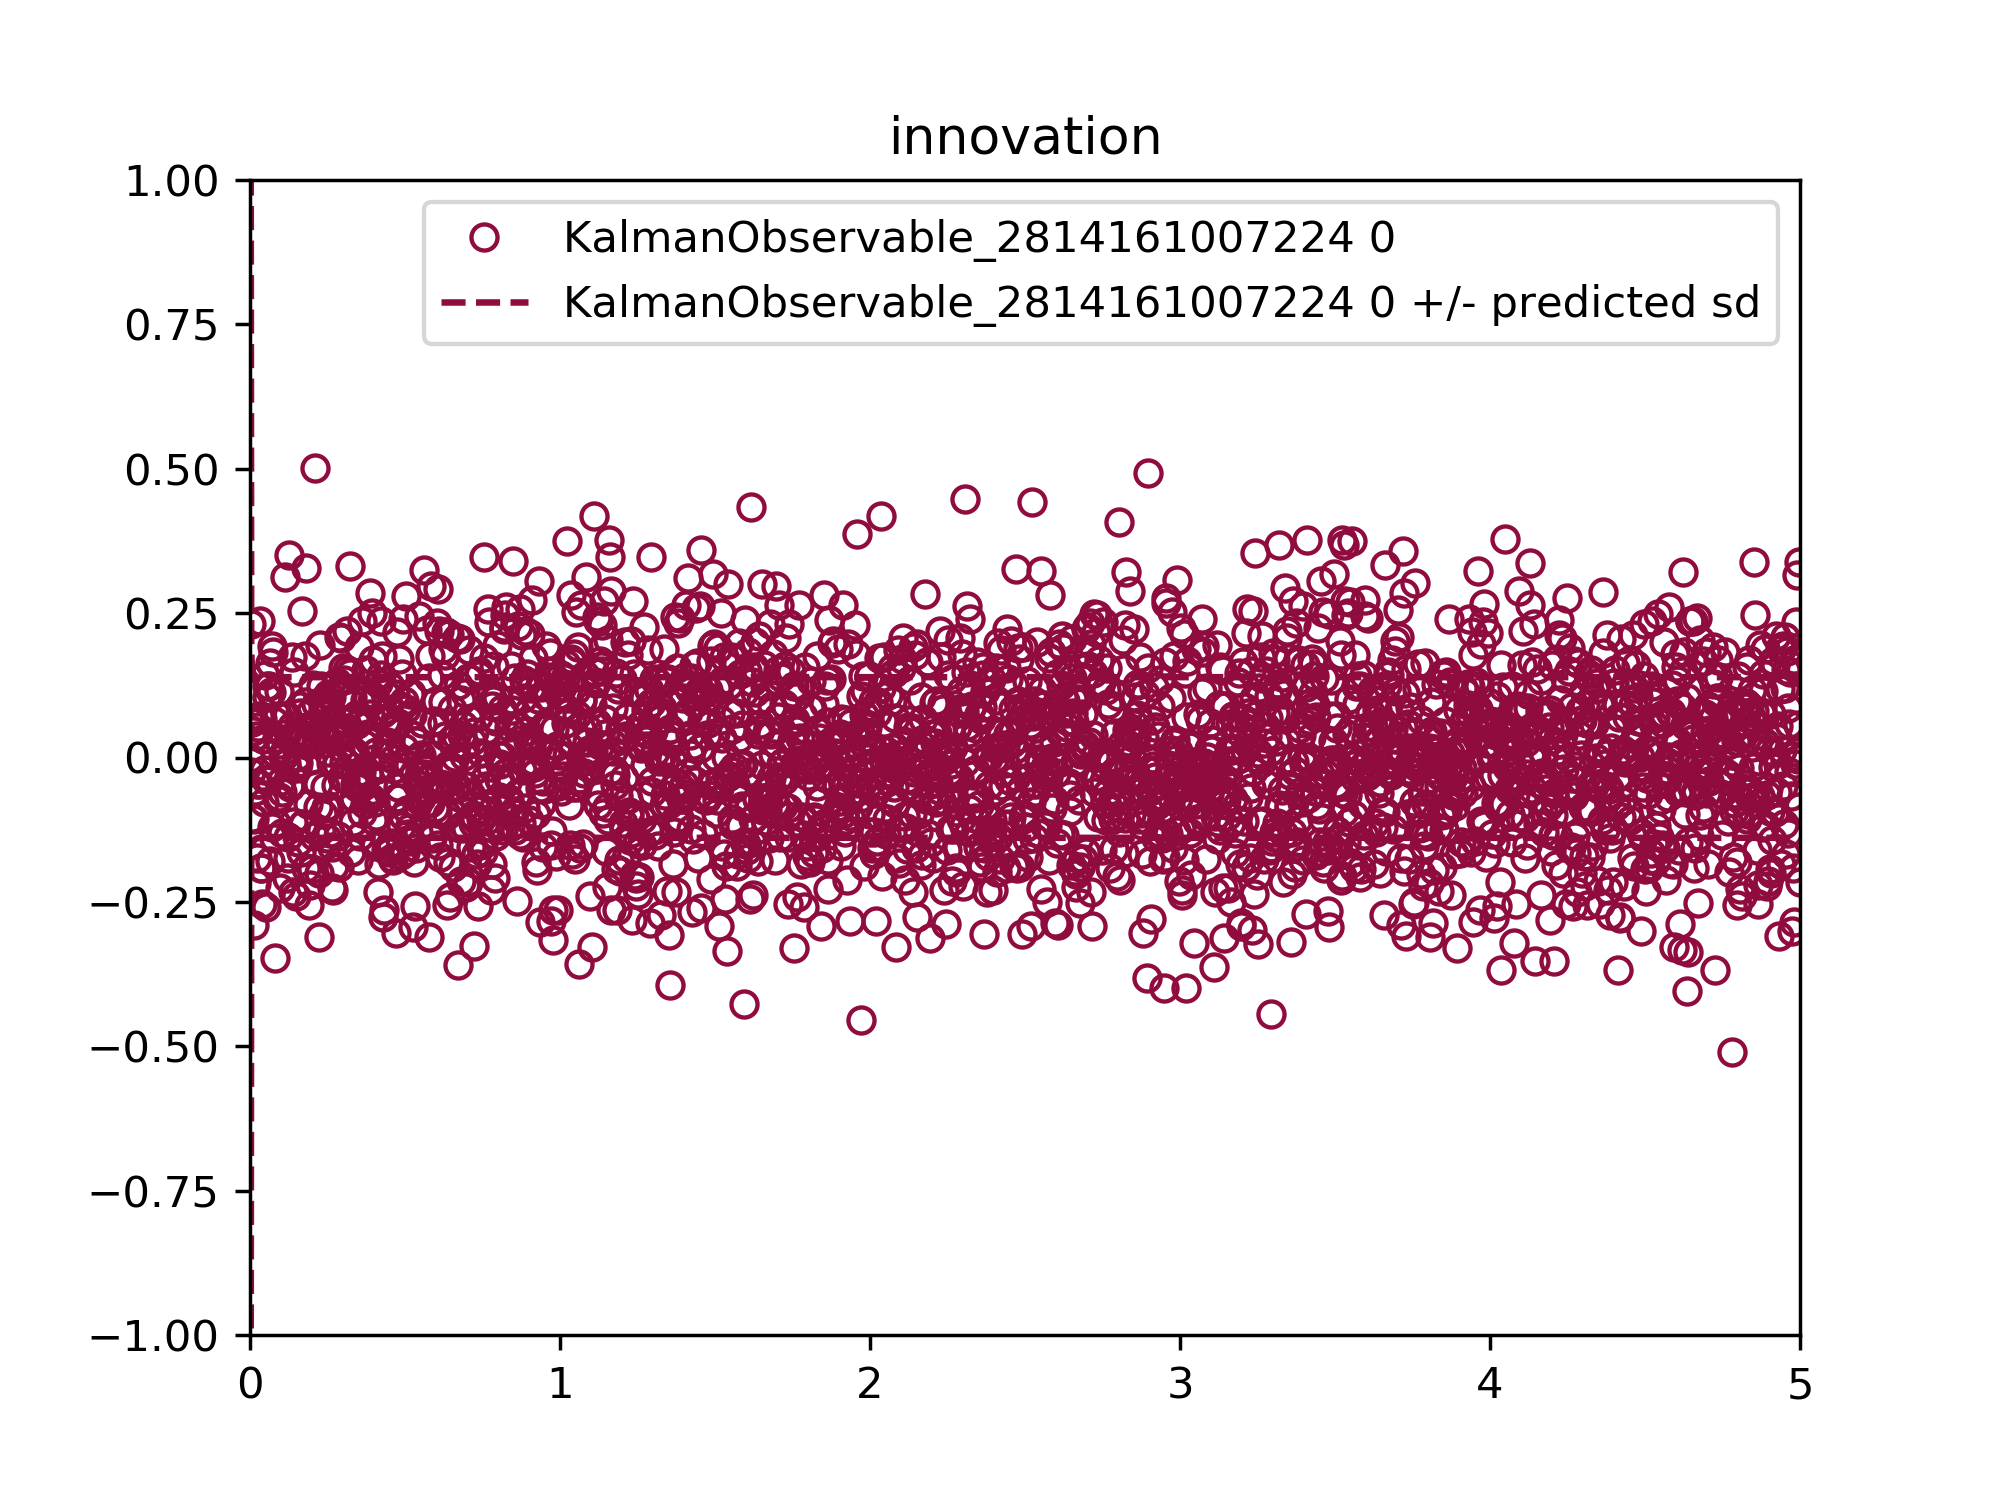

In [16]:
ep = visual.InnovPlot()
ep.process_run_df(run_df.df[1:])
ep.ax.set_ylim((-1, 1));

<IPython.core.display.Javascript object>


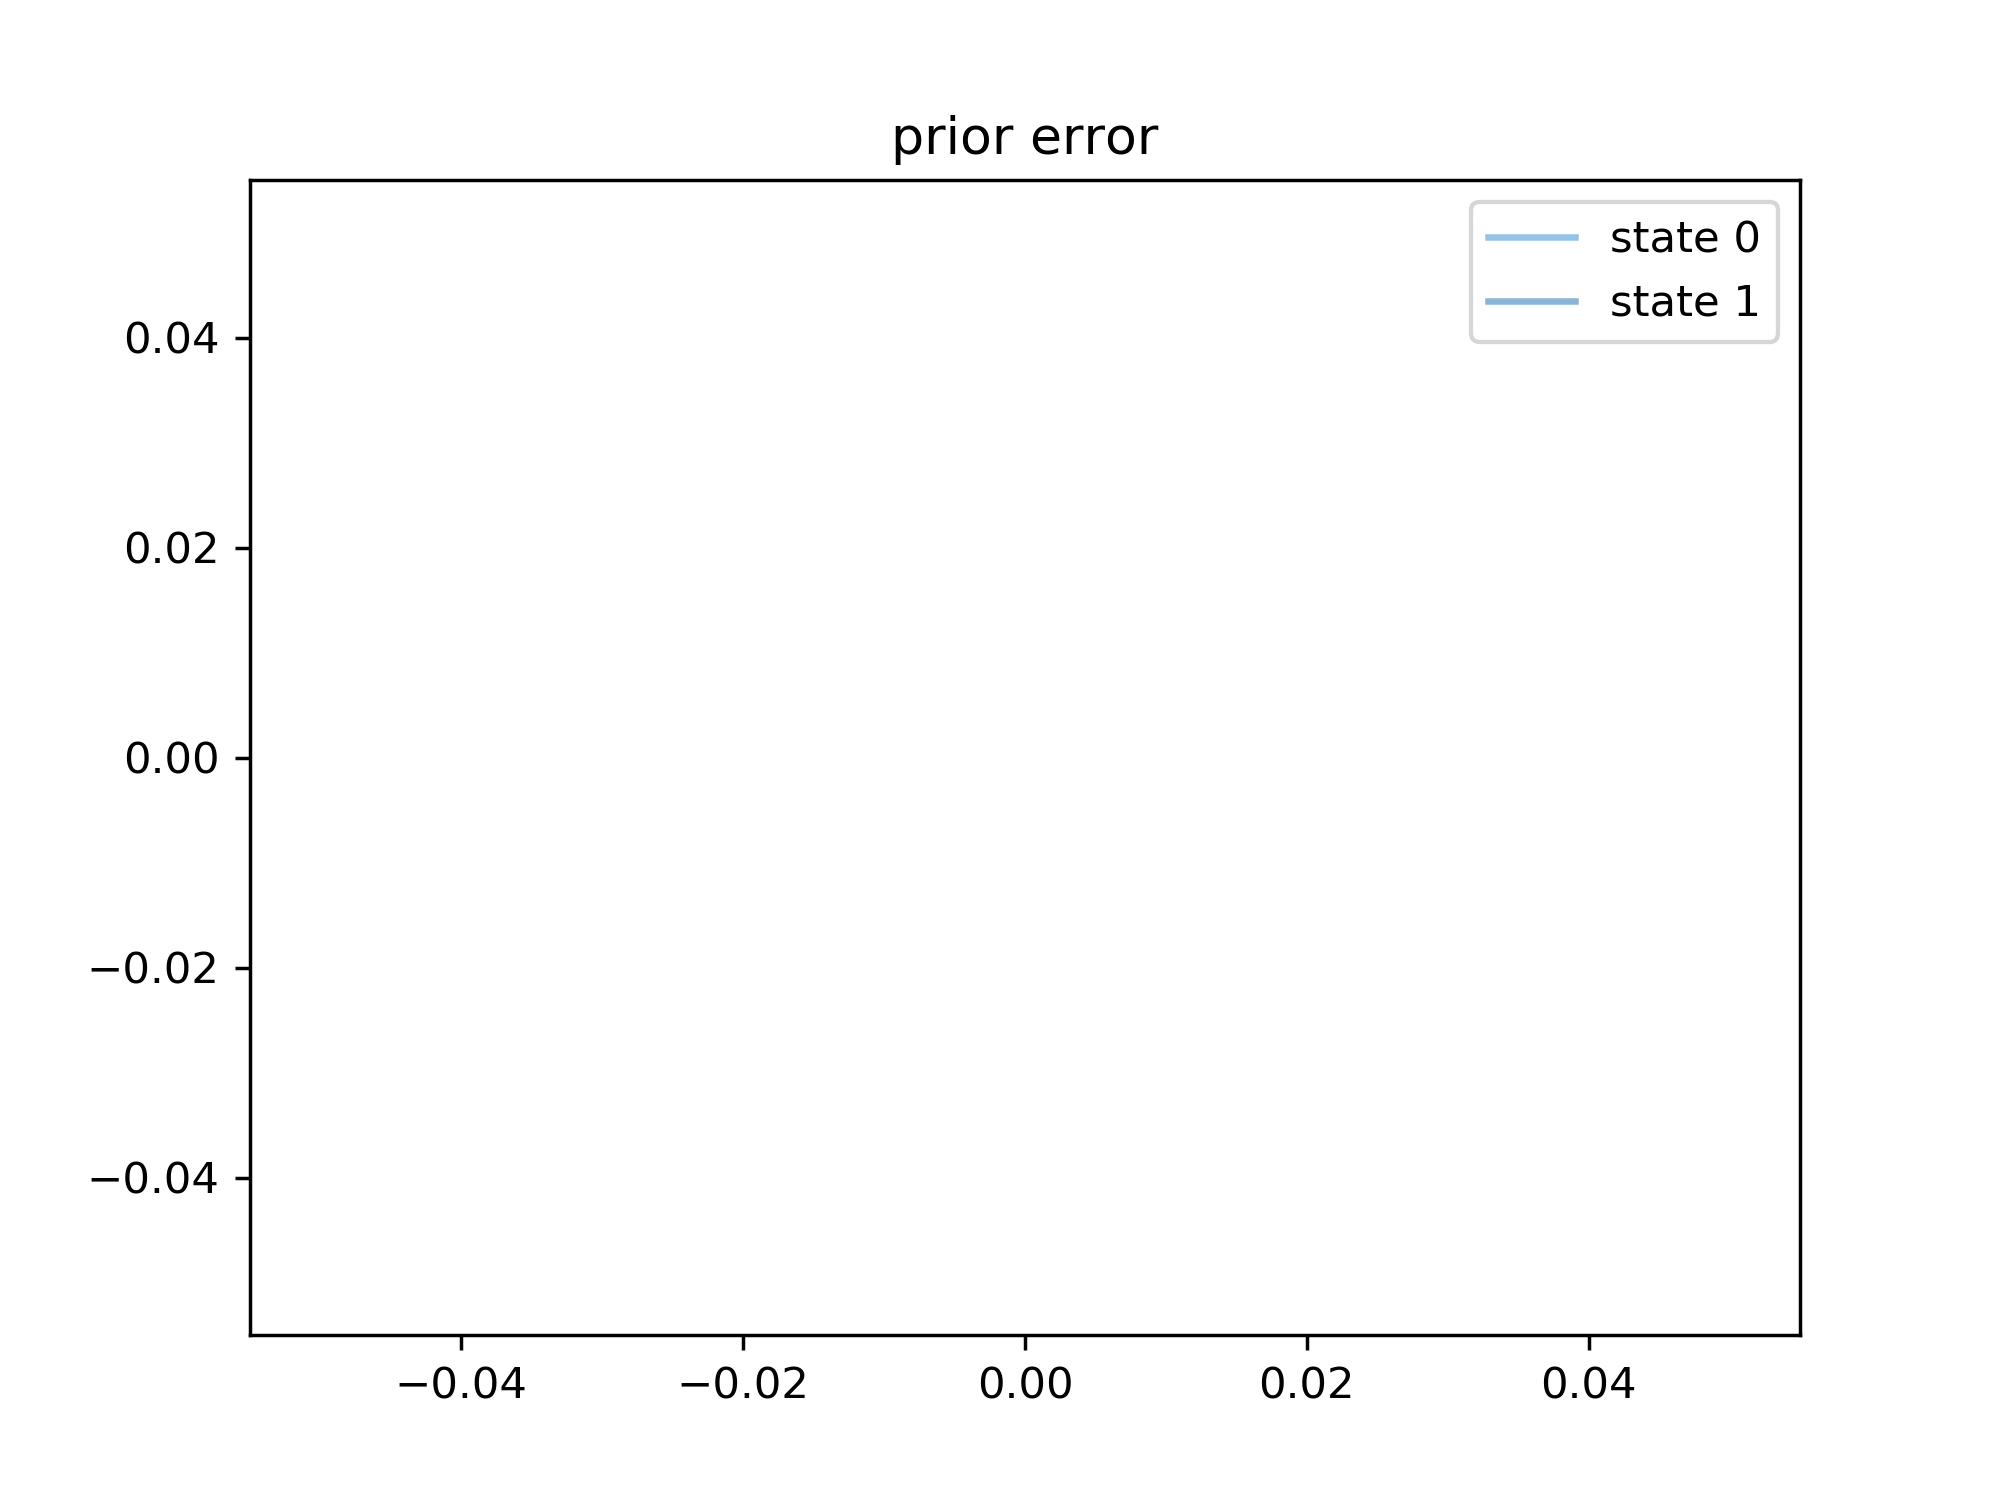

In [19]:
llp = visual.ErrorPlot();
llp.process_run_df(run_df.df[1:])

<IPython.core.display.Javascript object>


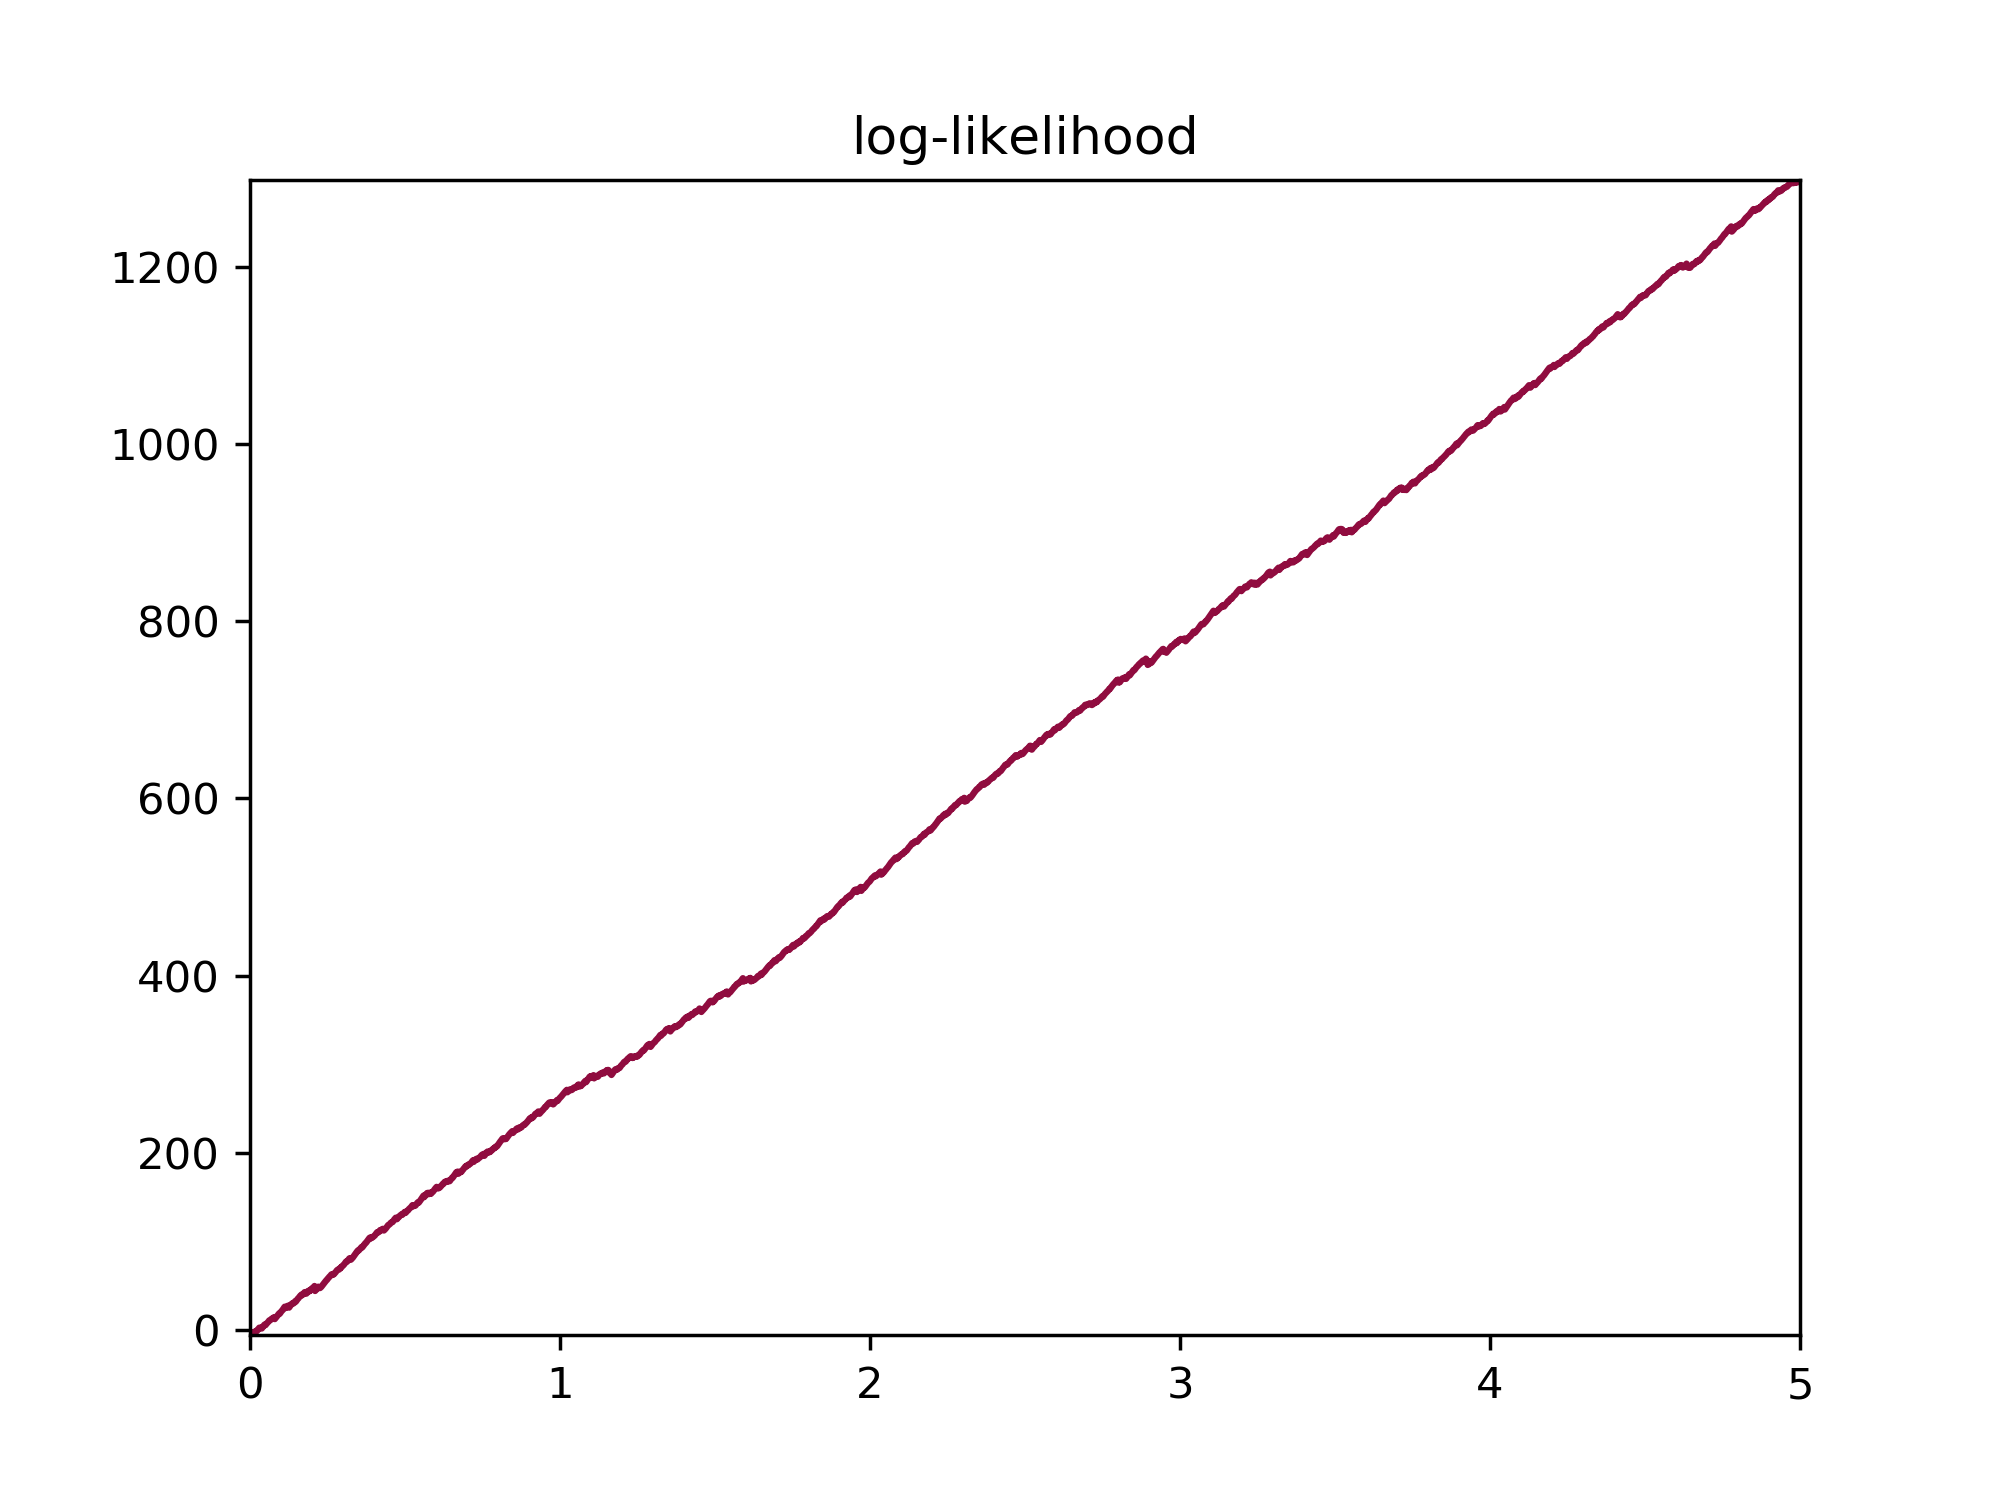

In [18]:
llp = visual.LogLikelihoodPlot(cumulative=True);
llp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


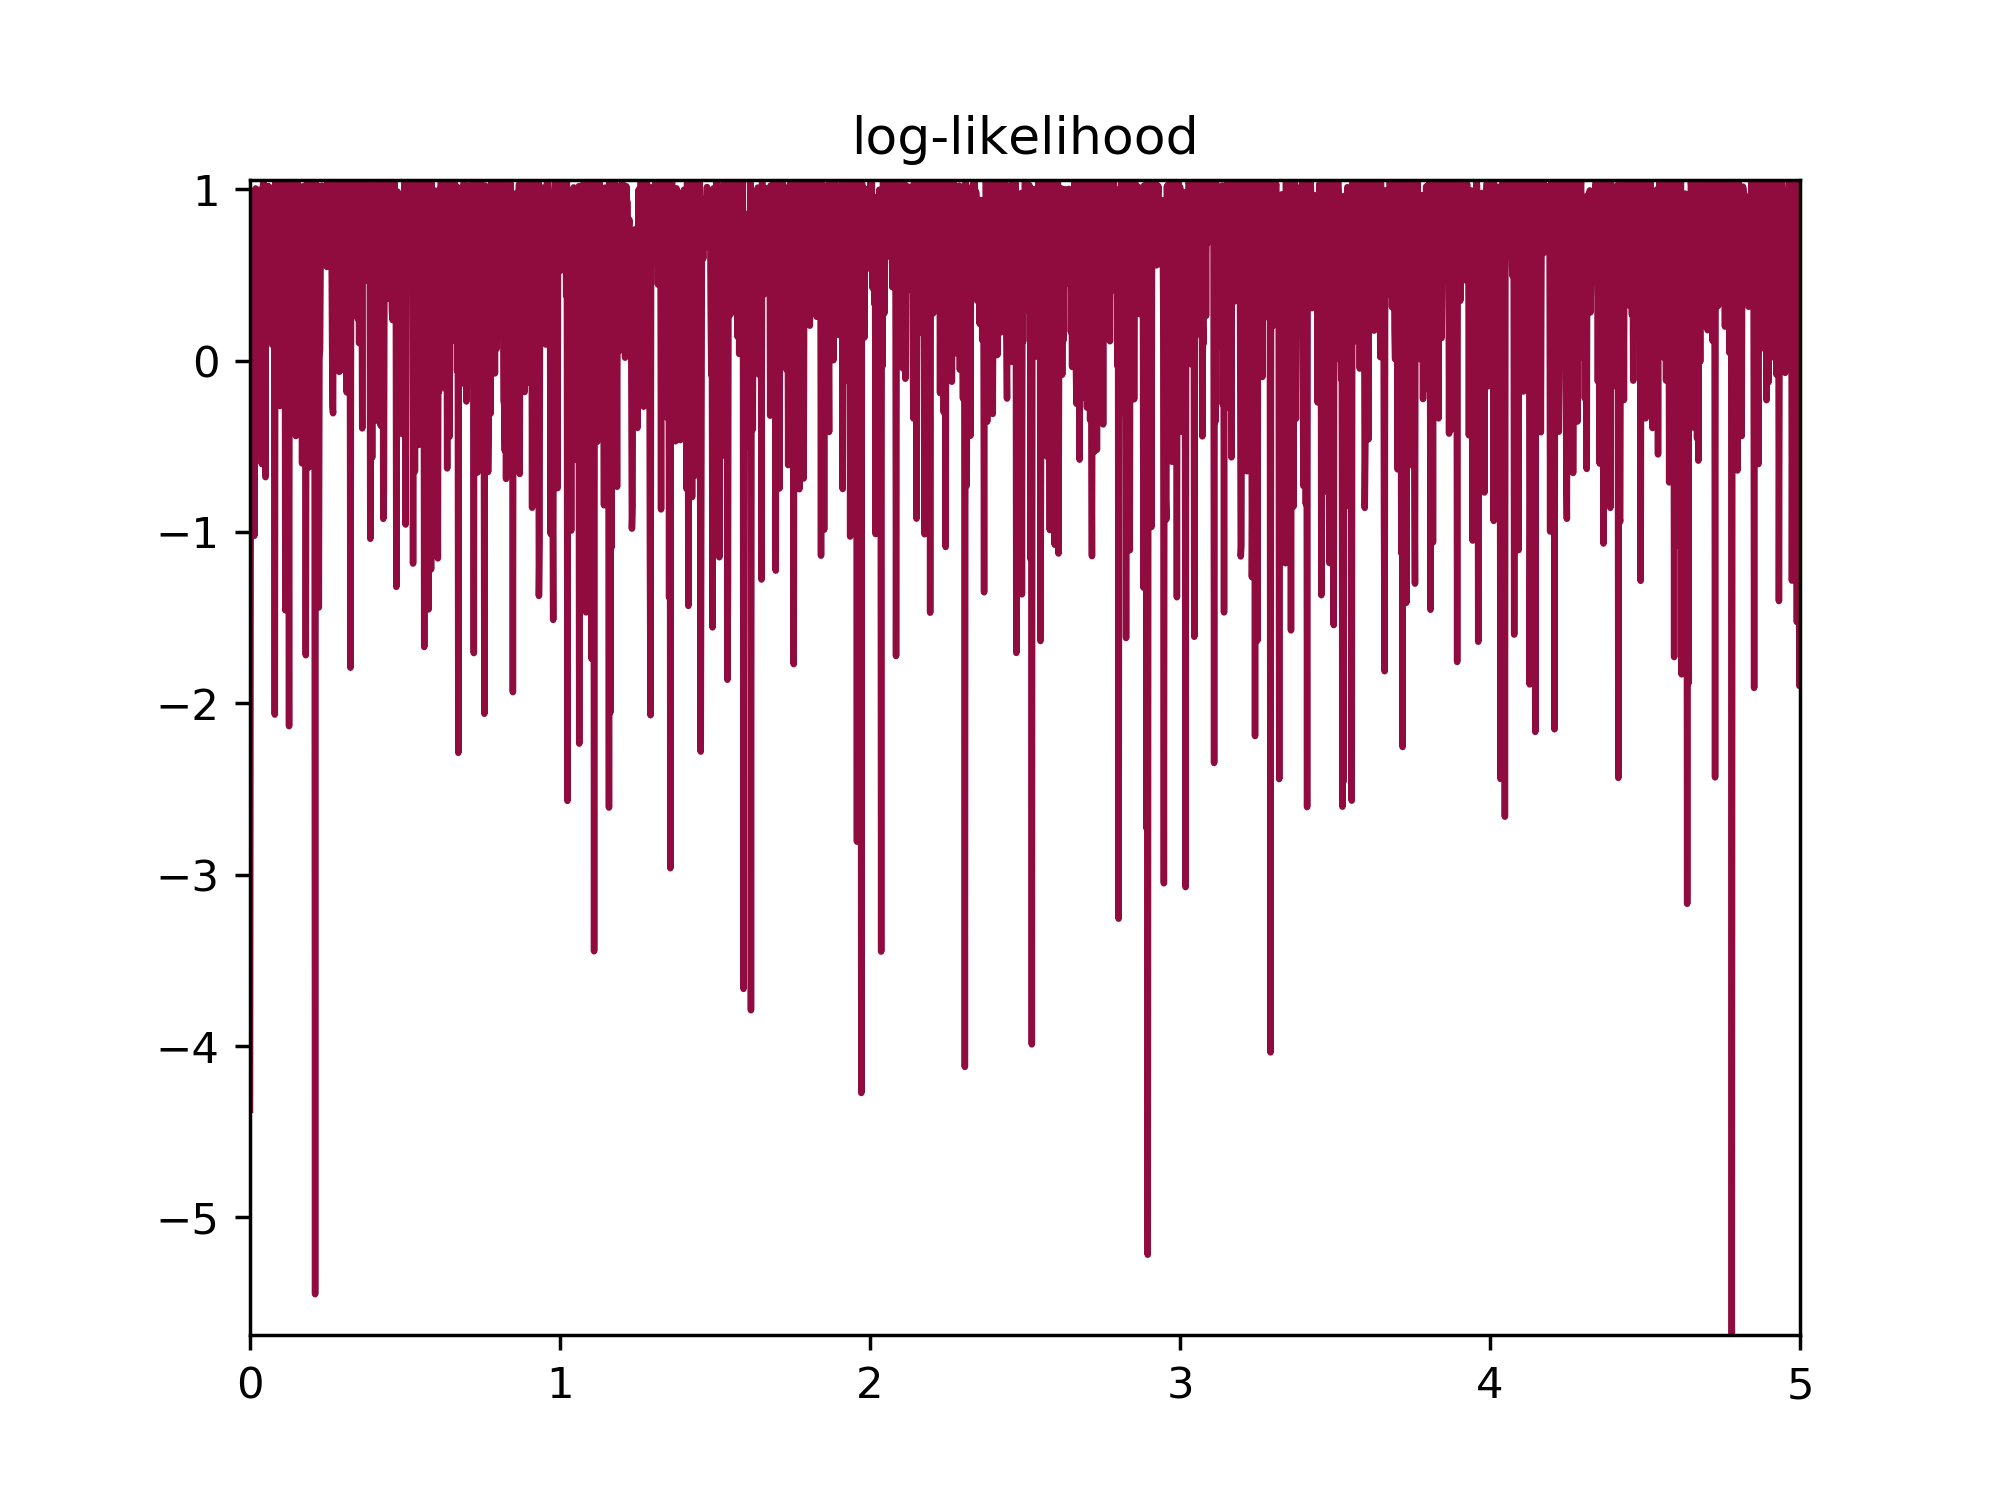

In [20]:
llp = visual.LogLikelihoodPlot(cumulative=False)
llp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


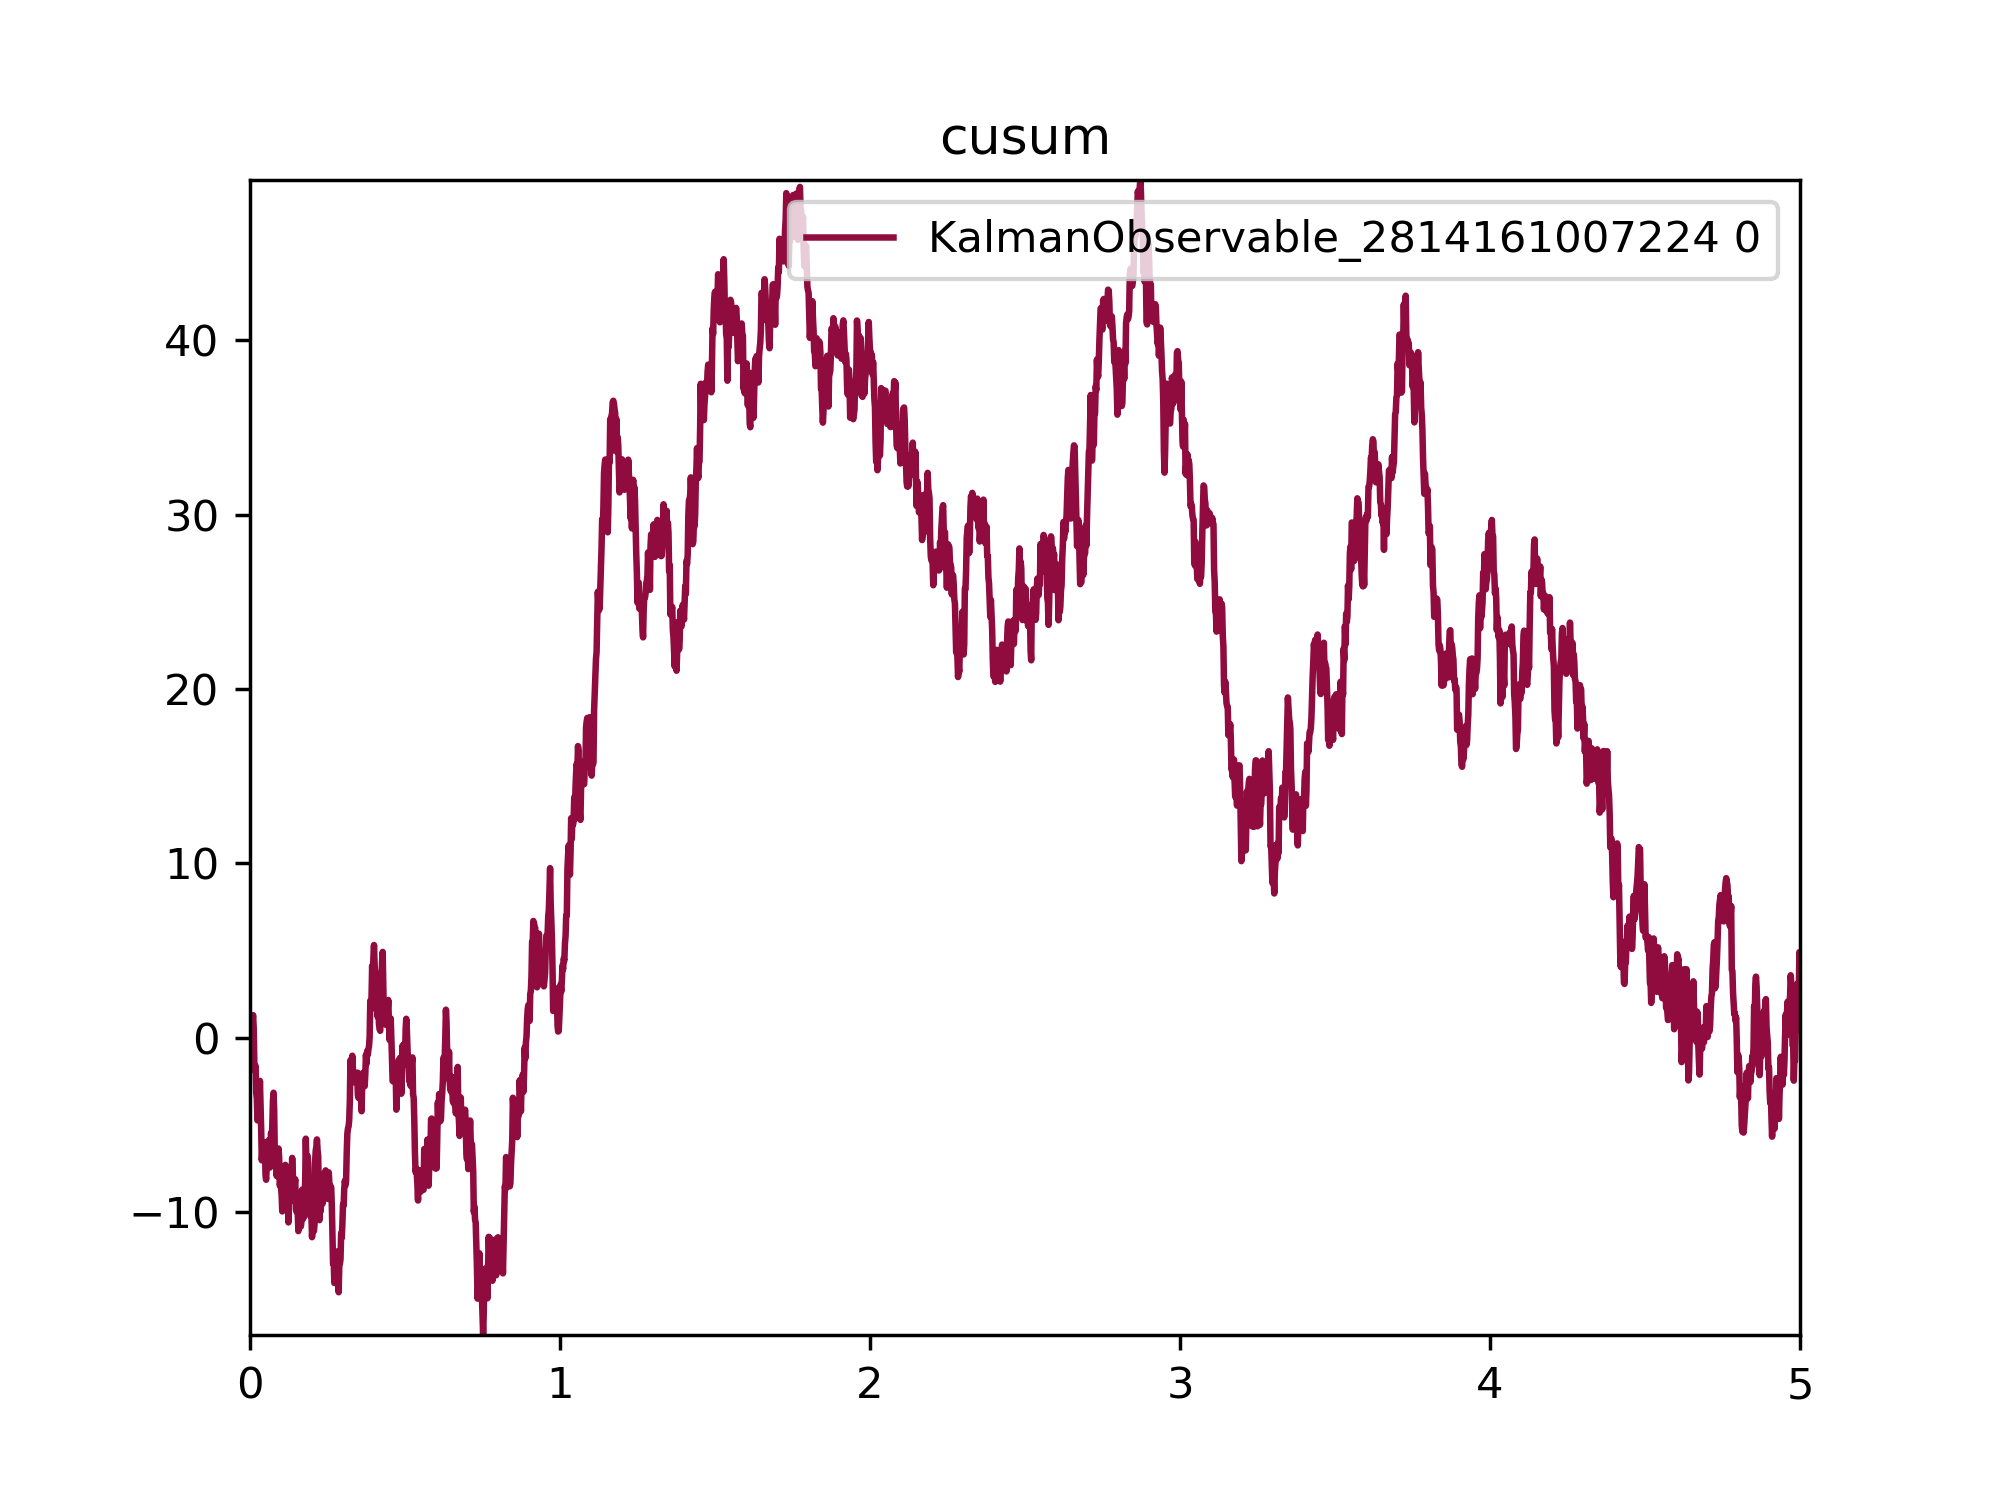

In [21]:
cp = visual.CUSUMPlot()
cp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


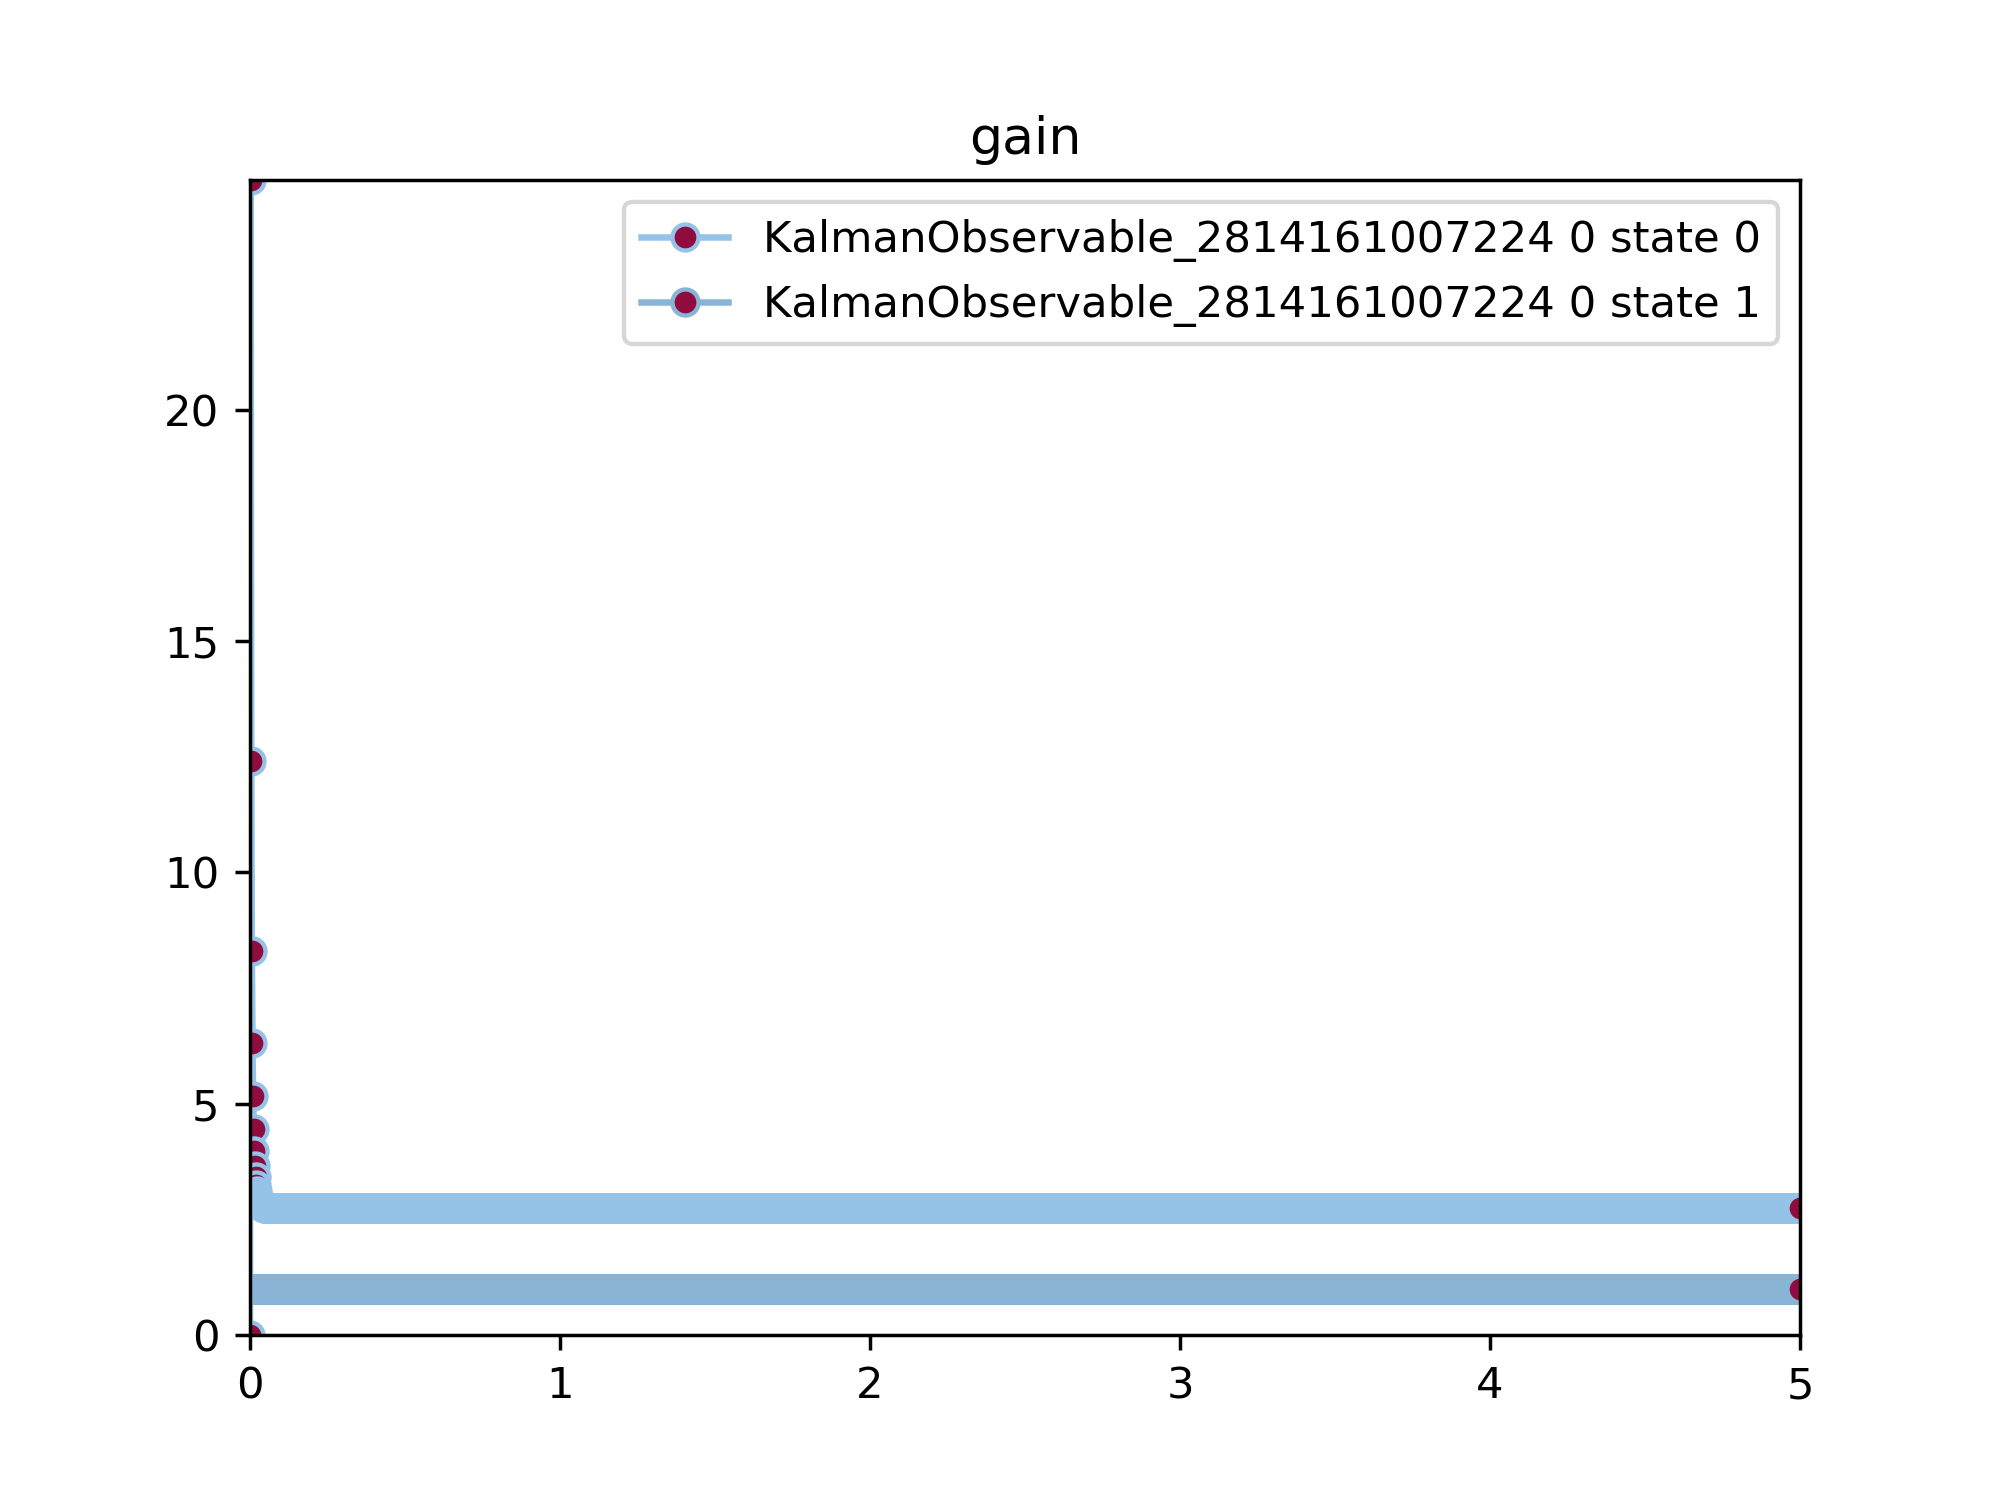

In [22]:
gp = visual.GainPlot(matrix_norm=False)
gp.process_run_df(run_df.df)

<IPython.core.display.Javascript object>


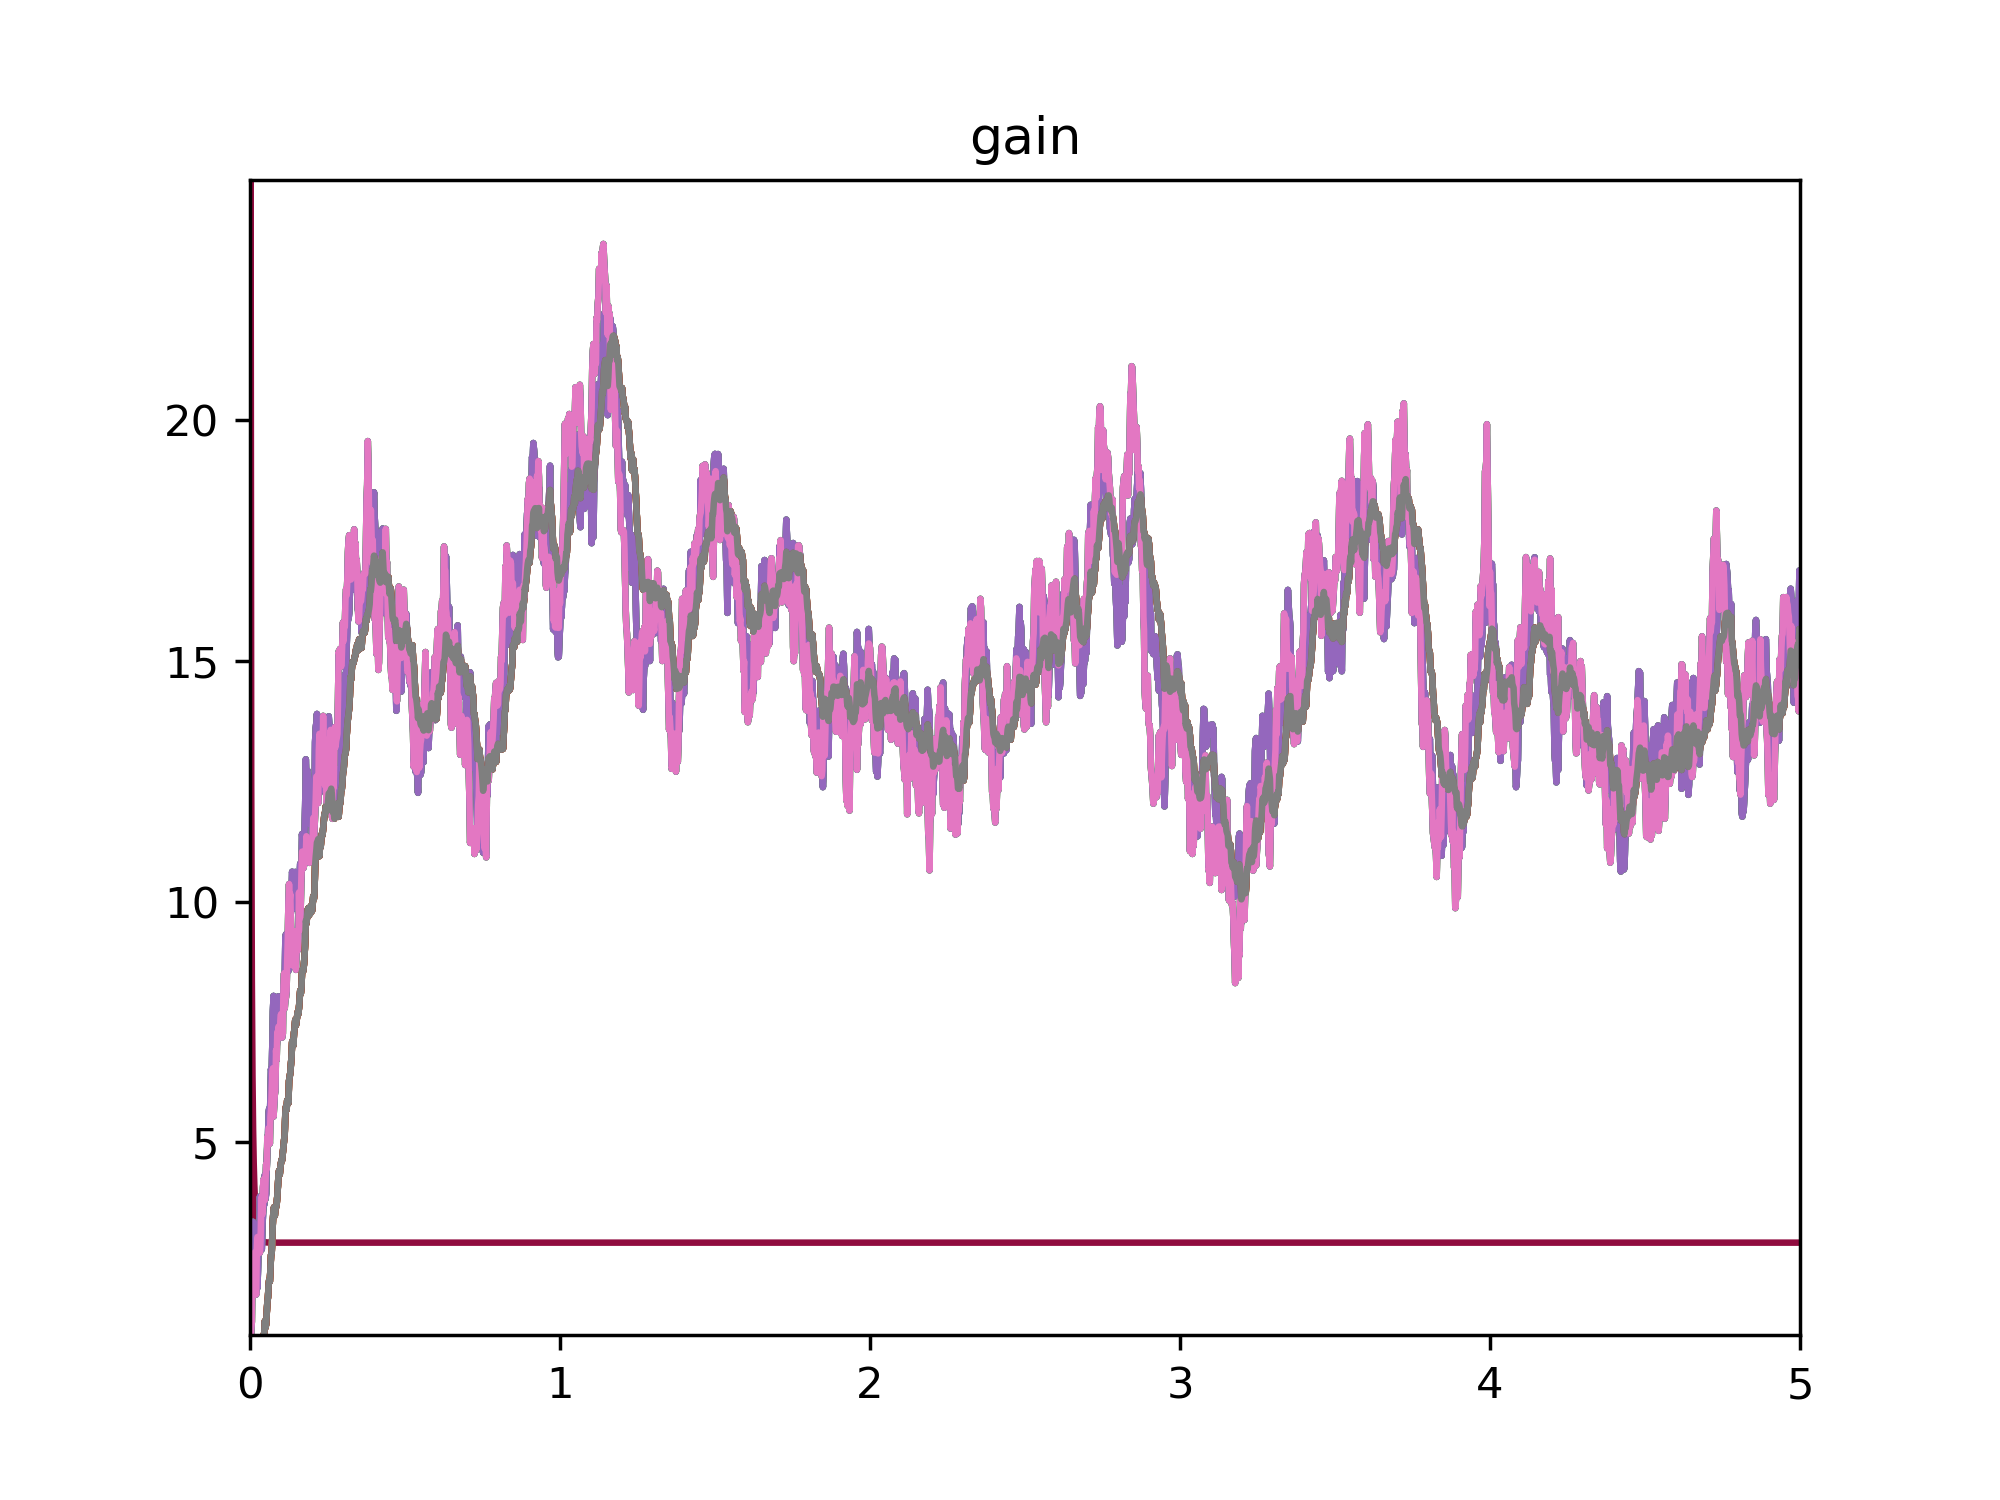

In [23]:
gp = visual.GainPlot(matrix_norm=True)
gp.process_run_df(run_df.df)

In [21]:
filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
state_observable = filtr.create_identity_observable(X)
first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)

In [22]:
ts, priors, posteriors, prior_values, posterior_values = [], [], [], [], []
for i, t in enumerate(df.index):
    ts.append(t)
    priors.append(state_observable.predict(t))
    prior_values.append(priors[-1].distr.mean.flatten())
    process_value = df.iloc[i].values
    last_observable.observe(N(process_value[-1], 0.), t)
    posteriors.append(state_observable.predict(t))
    posterior_values.append(posteriors[-1].distr.mean.flatten())
priors_df = pd.DataFrame(data=priors, index=ts)
posteriors_df = pd.DataFrame(data=posteriors, index=ts)
prior_values_df = pd.DataFrame(data=prior_values, index=ts)
posterior_values_df = pd.DataFrame(data=posterior_values, index=ts)

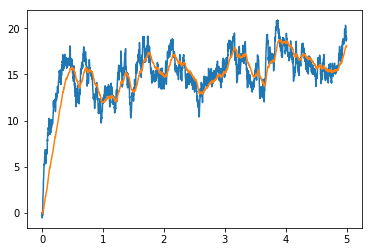

In [23]:
plt.figure()
plt.plot(posterior_values_df);

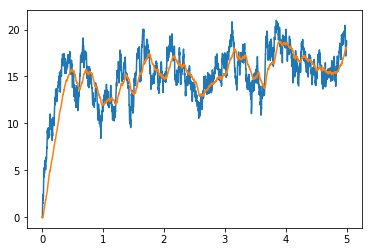

In [24]:
plt.figure()
plt.plot(df);

In [30]:
len(posterior_values_df[0].values)

2501

In [34]:
len(df[0].values)

2501

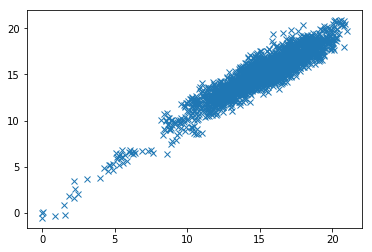

In [40]:
plt.plot(df[0].values, posterior_values_df[0].values, 'x')

In [9]:
def filter_run(mu, sigma1, sigma2, theta1, theta2):
    X = proc.OrnsteinUhlenbeckProcess.create_multiscale_from_vol(transition_vector=[theta1, theta2], mean=mu, vol=[[sigma1, .0], [.0, sigma2]])
    filtr = filtering.kalman.KalmanFilter(time=df.index[0], state_distr=N(mean=npu.col(0., 0.), cov=1000. * np.eye(2)), process=X)
    state_observable = filtr.create_identity_observable(X)
    first_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[1., 0.]]), X)
    last_observable = filtr.create_observable(kalman.KalmanFilterObsModel.create([[0., 1.]]), X)
    filter_run_result = filtering.run(observable=last_observable, obss=1, df=df)
    return npu.to_scalar(filter_run_result.cumulative_log_likelihood if filter_run_result.cumulative_log_likelihood is not None else np.nan)

In [10]:
filter_run(mu=20., sigma1=10., sigma2=3., theta1=20., theta2=20.)

2186.0014159249545

In [11]:
param_ranges = col.OrderedDict((
        ('mu', np.linspace(0., 40., 5)),
        ('sigma1', np.linspace(1., 20., 5)),
        ('sigma2', np.linspace(1., 20., 5)),
        ('theta1', np.linspace(.1, 30., 5)),
        ('theta2', np.linspace(.1, 30., 5))))

In [12]:
result = optimization.grid_search(
        filter_run, param_ranges,
        evaluator=evaluation.IPyParallelEvaluator(),
        optimization_id='OU process calibration: Kalman filter maximum likelihood')

In [13]:
result.evaluation_statuses[10]

Status(ready=True, work=Work(work_id=11, func=<function filter_run at 0x000001D14DE21620>, args=[], kwargs=OrderedDict([('mu', 0.0), ('sigma1', 1.0), ('sigma2', 1.0), ('theta1', 15.049999999999999), ('theta2', 0.10000000000000001)]), call_count=1, repeat_count=1, info={'param_ranges': OrderedDict([('mu', array([  0.,  10.,  20.,  30.,  40.])), ('sigma1', array([  1.  ,   5.75,  10.5 ,  15.25,  20.  ])), ('sigma2', array([  1.  ,   5.75,  10.5 ,  15.25,  20.  ])), ('theta1', array([  0.1  ,   7.575,  15.05 ,  22.525,  30.   ])), ('theta2', array([  0.1  ,   7.575,  15.05 ,  22.525,  30.   ]))]), 'param_names': ['mu', 'sigma1', 'sigma2', 'theta1', 'theta2'], 'param_value_indices': [0, 0, 0, 2, 0], 'optimization_id': 'OU process calibration: Kalman filter maximum likelihood', 'work_id': 11}), result=Result(work_id=11, func=<function filter_run at 0x000001D14F994730>, args=[], kwargs=OrderedDict([('mu', 0.0), ('sigma1', 1.0), ('sigma2', 1.0), ('theta1', 15.049999999999999), ('theta2', 0.10

<IPython.core.display.Javascript object>


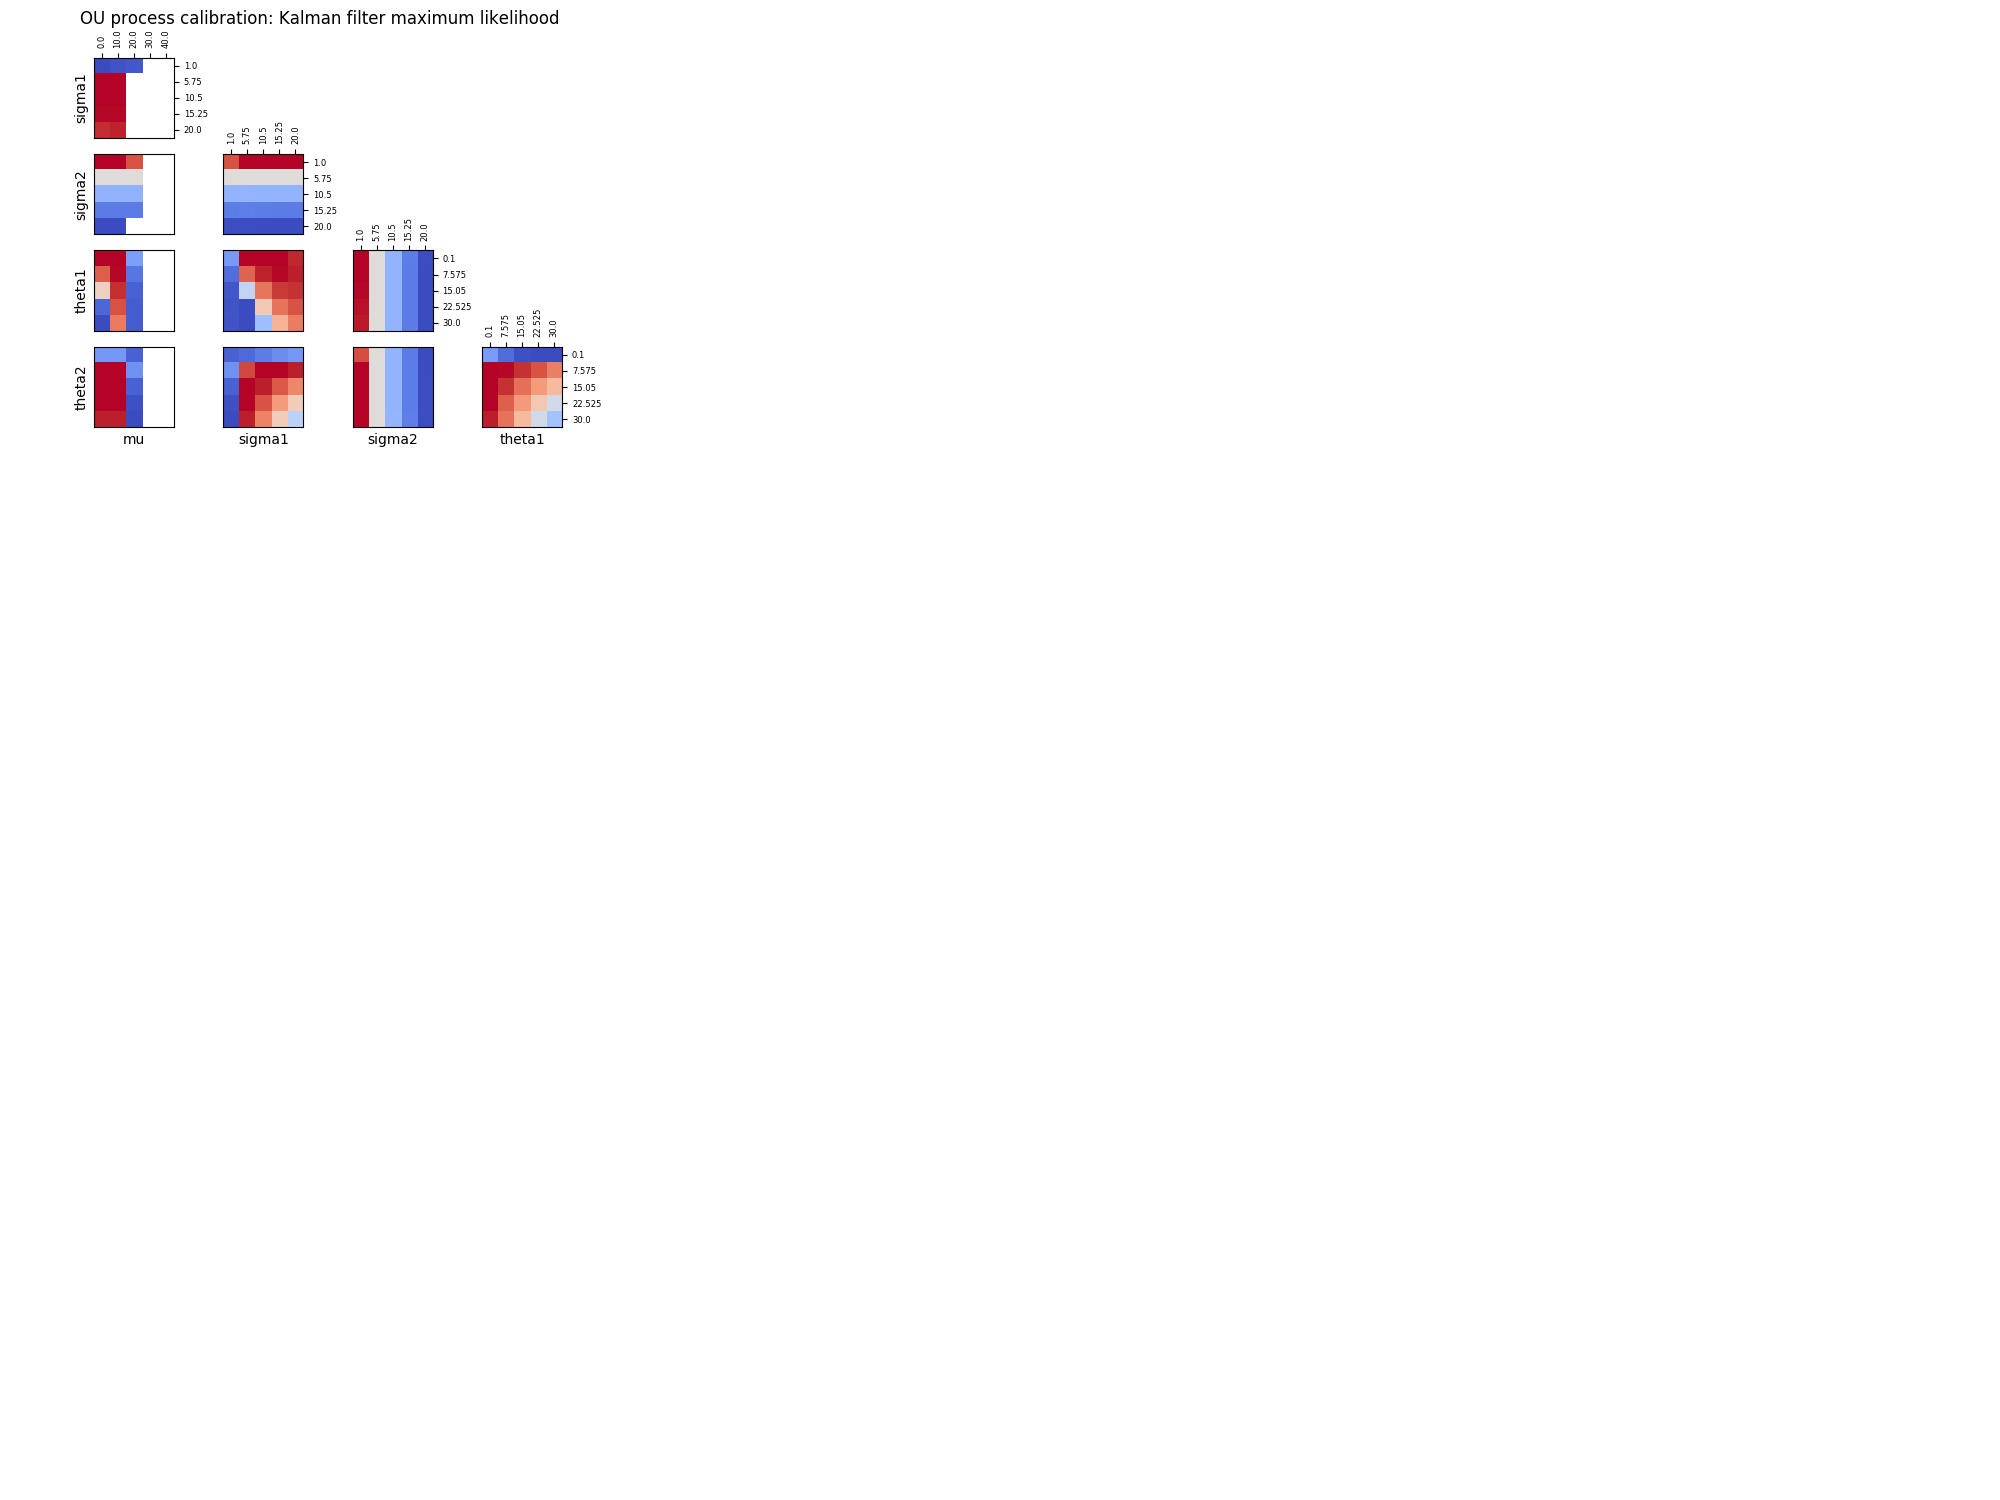

KeyboardInterrupt: 

In [14]:
optvisual.visualize_grid_search(result, refresh_until_ready=True, aggregate_func=np.nanmax, empty_aggregate=np.nan);